## Importing all the packages

In [1]:
import os
import pandas as pd
import numpy as np
from arch.univariate import EWMAVariance
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro,normaltest
from pyspc import *

# Import required libraries
import statistics

C:\Users\Simranpal Kohli\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Understanding

In [2]:
data_file_path="D:\\CIT\\Sem3\\Pharmaceutical\\Data\\"

# Creating a function to give print features
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
dpc_df=pd.read_csv(data_file_path+'Product A DPC data.csv')

__Function to print the dataframe basics operations__

In [4]:
def dataframe_basics(df):
    print(color.BOLD +"Data Types:" + color.END + "\n",df.dtypes)
    print("\n"+color.BOLD +"Dataframe Shape:" + color.END + "\n",df.shape)
    print("\n"+color.BOLD +"Dataframe head:" + color.END + "\n",df.head())
    
dataframe_basics(dpc_df)

Data Types:
 Date            object
UnitID          object
Batch            int64
AccTime         object
AccVolume       object
AIR101          object
AIR121pH        object
AIR131UV        object
BatchID_Calc    object
BlockTime       object
BlockVolume     object
CurrentBlock    object
FIR141          object
Pdiff           object
PIR111          object
PIR112          object
PU313           object
PU351           object
TIR101          object
dtype: object

Dataframe Shape:
 (486158, 19)

Dataframe head:
               Date UnitID   Batch  AccTime AccVolume AIR101 AIR121pH  \
0  9/20/2016 20:20  SK351  891813  2.60494         0   20.5  3.93283   
1  9/20/2016 20:21  SK351  891813  2.94141         0   20.5     3.93   
2  9/20/2016 20:22  SK351  891813  3.00093         0   20.5  3.93134   
3  9/20/2016 20:23  SK351  891813  3.06045         0   20.5     3.94   
4  9/20/2016 20:24  SK351  891813  3.11997         0   20.5  3.93097   

    AIR131UV                                       Ba

__Convert object type to it's respective data type__

In [5]:
# dpc_df['Date'] = pd.to_datetime(dpc_df['Date'],format='%m/%d/%Y %H:%M:%S') # not working code
# dpc_df['Date'] = pd.to_datetime(dpc_df['Date'],errors='coerce')
# dpc_df['Date'] = pd.to_datetime(dpc_df['Date'],format='%m/%d/%Y')

# Object to Datetime conversion:
dpc_df['Date'] = pd.to_datetime(dpc_df['Date'].str.split(" ", 1, expand=True)[0], format='%m/%d/%Y')

# Object to int64/float conversion:
objTOint_cols = dpc_df.columns.drop(['Date','UnitID','Batch','BatchID_Calc','CurrentBlock'])
dpc_df[objTOint_cols] = dpc_df[objTOint_cols].apply(pd.to_numeric, errors='coerce')

# Print the changed datatypes:
dataframe_basics(dpc_df)

Data Types:
 Date            datetime64[ns]
UnitID                  object
Batch                    int64
AccTime                float64
AccVolume              float64
AIR101                 float64
AIR121pH               float64
AIR131UV               float64
BatchID_Calc            object
BlockTime              float64
BlockVolume            float64
CurrentBlock            object
FIR141                 float64
Pdiff                  float64
PIR111                 float64
PIR112                 float64
PU313                  float64
PU351                  float64
TIR101                 float64
dtype: object

Dataframe Shape:
 (486158, 19)

Dataframe head:
         Date UnitID   Batch   AccTime  AccVolume  AIR101  AIR121pH  AIR131UV  \
0 2016-09-20  SK351  891813  2.604944        0.0    20.5  3.932826  0.093826   
1 2016-09-20  SK351  891813  2.941407        0.0    20.5  3.930000  0.094005   
2 2016-09-20  SK351  891813  3.000929        0.0    20.5  3.931336  0.094185   
3 2016-09-20  

__Analysing the value counts of each variable__

In [6]:
# print(dpc_df.Date.str[:9].value_counts()) # ---9/20/2016    486158 Name: Date, dtype: int64
# print(dpc_df.UnitID.value_counts()) # ---SK351    486158     Name: UnitID, dtype: int64
# print(dpc_df.Batch.value_counts()) # --Name: Batch, Length: 112, dtype: int64
# print(dpc_df.AccTime.value_counts()) # --Name: AccTime, Length: 176931, dtype: int64
# print(dpc_df.AccVolume.value_counts()) # --Name: AccVolume, Length: 145495, dtype: int64
# print(dpc_df.AIR101.value_counts()) # --Name: AIR101, Length: 44663, dtype: int64
# print(dpc_df.AIR121pH.value_counts()) # --Name: AIR121pH, Length: 72773, dtype: int64
# print(dpc_df.AIR131UV.value_counts()) # --Name: AIR131UV, Length: 189272, dtype: int64
# print(dpc_df.BatchID_Calc.value_counts()) # --Name: BatchID_Calc, Length: 116, dtype: int64
# print(dpc_df.BlockTime.value_counts()) # --Name: BlockTime, Length: 166681, dtype: int64
# print(dpc_df.BlockVolume.value_counts()) # --Name: BlockVolume, Length: 273324, dtype: int64
# print(dpc_df.CurrentBlock.value_counts()) # --Name: CurrentBlock, Length: 75, dtype: int64
# print(dpc_df.FIR141.value_counts()) # --Name: FIR141, Length: 149020, dtype: int64
# print(dpc_df.Pdiff.value_counts()) # --Name: Pdiff, Length: 352673, dtype: int64
# print(dpc_df.PIR111.value_counts()) # --Name: PIR111, Length: 99832, dtype: int64
# print(dpc_df.PIR112.value_counts()) # --Name: PIR112, Length: 370353, dtype: int64
# print(dpc_df.PU313.value_counts()) # --Name: PU313, dtype: int64
# print(dpc_df.PU351.value_counts()) # --Name: PU351, Length: 136432, dtype: int64
# print(dpc_df.TIR101.value_counts()) # --Name: TIR101, Length: 342337, dtype: int64

In [7]:
in_out_df=pd.read_excel(data_file_path+'Input vs Output.xlsx')
del in_out_df['Unnamed: 3']
dataframe_basics(in_out_df)

Data Types:
 Batch ID        int64
Output        float64
Input           int64
Batch ID.1     object
Yeild           int64
dtype: object

Dataframe Shape:
 (99, 5)

Dataframe head:
    Batch ID   Output  Input Batch ID.1  Yeild
0    899032  2452.05   2731     899032     90
1    899409  2232.20   2559     899409     87
2    899641  2497.16   2677     899641     93
3    900105  2259.81   2454     900105     92
4    900298  2364.71   2541     900298     93


__Finding number of Matching BatchId from both the dataframe__

In [8]:
in_out_batchid_ls=in_out_df['Batch ID'].value_counts().index.tolist()
in_out_batchid_ls.sort()
dpc_batchid_ls=dpc_df.Batch.value_counts().index.tolist()
dpc_batchid_ls.sort()

print("Total number of matching BatchId's \n",len(list(set(dpc_batchid_ls).intersection(in_out_batchid_ls))))

# Function: to find the BatchId presence in each list
def batch_id_presence(ls_type):
    if ls_type=='dpc':
        set_difference = set(dpc_batchid_ls) - set(in_out_batchid_ls)
    else:
        set_difference = set(in_out_batchid_ls) - set(dpc_batchid_ls)    
    return list(set_difference)

# Below batchid's which are present in dpc & not in "input output"
print("\n BatchId's which are present in dpc & not in input output: \n",batch_id_presence('dpc'))

# Below batchid's which are present in "input output" & not in dpc
print("\n BatchId's which are present in input output & not in dpc: \n",batch_id_presence('in_out'))

Total number of matching BatchId's 
 96

 BatchId's which are present in dpc & not in input output: 
 [893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 892914, 893971, 892374, 892151, 894649, 892762]

 BatchId's which are present in input output & not in dpc: 
 [946634, 900298, 902493]


__Creating a filter function & adding to pandas library__

In [9]:
# This function will be applied to pandas dataframe directly, if we want to apply & over the filter
# we can do so using pandas overloaded operator. 
def mask_one_equal(df, key, value):
   return df[df[key] == value]
pd.DataFrame.mask_one_equal = mask_one_equal

def mask_many_equal(df, key, value):
   return df[df[key].isin(value)]
pd.DataFrame.mask_many_equal = mask_many_equal

print("Using above filter functions to test the restuls")
dpc_df.mask_one_equal('Batch',899032).mask_one_equal('CurrentBlock','RECIRCULATION_PREP_NAOH')

Using above filter functions to test the restuls


,Date,UnitID,Batch,AccTime,AccVolume,AIR101,AIR121pH,AIR131UV,BatchID_Calc,BlockTime,BlockVolume,CurrentBlock,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
81887,2016-09-20,SK351,899032,46941.20703,17306.7207,156.000000,13.38,0.099752,Calc Failed,0.103940,0.018941,RECIRCULATION_PREP_NAOH,0.0,0.000383,0.0,0.045576,0.0,1.231199,20.194979
81888,2016-09-20,SK351,899032,46941.53906,17306.7207,156.199997,13.38,0.099096,Calc Failed,0.439592,0.045172,RECIRCULATION_PREP_NAOH,0.0,0.001040,0.0,0.050781,0.0,3.021427,20.178095
81889,2016-09-20,SK351,899032,46941.87500,17306.7207,156.199997,13.39,0.098440,Calc Failed,0.775244,0.071403,RECIRCULATION_PREP_NAOH,0.0,0.001696,0.0,0.055986,0.0,4.811656,20.141283
81890,2016-09-20,SK351,899032,46942.21094,17306.7207,156.274383,13.39,0.097785,Calc Failed,1.110896,0.097635,RECIRCULATION_PREP_NAOH,0.0,0.002352,0.0,0.061192,0.0,6.601884,20.125618


__Displaying normal operating BatchId's where Output is greater than input__

In [10]:
# in_out_df.mask_many_equal('Batch',[900889, 902493, 902676, 902780])

In [11]:
# Normal operating list of batch id's. as Output is greater than input
out_greater_in=list(in_out_df['Batch ID'][(in_out_df['Output'] > in_out_df['Input'])])
print("Output is greater than input list  \n",out_greater_in)

# Below are the continous data where output is greater than input.(normal operating model)
dpc_df.mask_many_equal('Batch',out_greater_in).head(5)

Output is greater than input list  
 [900889, 902493, 902676, 902780]


,Date,UnitID,Batch,AccTime,AccVolume,AIR101,AIR121pH,AIR131UV,BatchID_Calc,BlockTime,BlockVolume,CurrentBlock,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
119622,2016-09-20,SK351,900889,2.094366,0.0,20.1,3.97,0.0,v:UNICORN\DPCCNTO1275(20170401001815)900889C.r...,2.094366,0.0,,0.0,0.0,0.02,0.02,0.0,0.0,19.589655
119623,2016-09-20,SK351,900889,2.900000,0.0,20.1,3.97,0.0,v:UNICORN\DPCCNTO1275(20170401001815)900889C.r...,0.000000,0.0,Setup,0.0,0.0,0.02,0.02,0.0,0.0,19.632429
119624,2016-09-20,SK351,900889,2.900000,0.0,20.1,3.97,0.0,v:UNICORN\DPCCNTO1275(20170401001815)900889C.r...,0.000000,0.0,Setup,0.0,0.0,0.02,0.02,0.0,0.0,19.621435
119625,2016-09-20,SK351,900889,2.900000,0.0,20.1,3.97,0.0,v:UNICORN\DPCCNTO1275(20170401001815)900889C.r...,0.000000,0.0,Setup,0.0,0.0,0.02,0.02,0.0,0.0,19.552103
119626,2016-09-20,SK351,900889,2.900000,0.0,20.1,3.97,0.0,v:UNICORN\DPCCNTO1275(20170401001815)900889C.r...,0.000000,0.0,Setup,0.0,0.0,0.02,0.02,0.0,0.0,19.590721


In [12]:
# Understanding the number of Inputs with more than one value so that we can analyse the
# same type of inputs to understand the variation in the continuous variable
print(in_out_df.Input.value_counts(),"\n")
print(in_out_df.mask_one_equal("Input",2218)['Batch ID'])

2218    2
2872    2
2456    2
2658    2
2646    2
       ..
1942    1
2524    1
2654    1
2016    1
2667    1
Name: Input, Length: 93, dtype: int64 

24    905591
82    952551
Name: Batch ID, dtype: int64


In [13]:
# print(dpc_df.mask_one_equal("Batch",905591))
# print(dpc_df.mask_one_equal("Batch",952551))

### Finding Correlation between variables

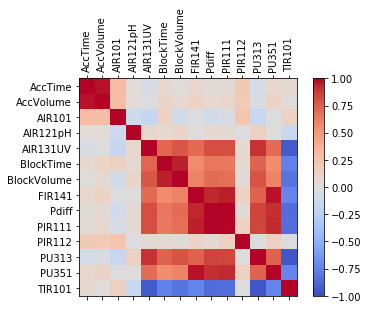

In [14]:
import numpy as np
corr_cols = dpc_df.columns.drop(['Date','UnitID','Batch','BatchID_Calc','CurrentBlock'])
corr_df=dpc_df[corr_cols]
corr = corr_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)
plt.show()

Text(0.5, 1, 'Correlation matrix')

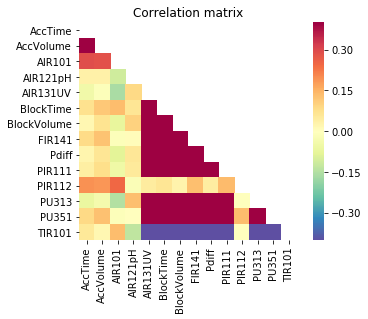

In [15]:
import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

## Descriptive statistics

In [16]:
dpc_df.describe()

,Batch,AccTime,AccVolume,AIR101,AIR121pH,AIR131UV,BlockTime,BlockVolume,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
count,486158.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000,467988.000000
mean,918826.920156,15127.683499,5636.097622,39.716883,6.489707,5.450268,1214.982317,491.551617,390.538191,0.408639,0.432343,0.050089,4.468738,11.866896,18.670543
std,21037.748608,14355.831345,5371.433338,58.814993,1.728196,13.983146,3024.891346,1450.864723,700.796048,0.772034,0.806224,0.082497,12.432597,19.987956,2.912529
min,891813.000000,0.000000,0.000000,0.000000,0.087571,0.000000,0.000000,0.000000,0.000000,-0.459581,0.000000,0.000000,0.000000,0.000000,2.760263
25%,900889.000000,1572.400024,704.590027,17.000000,5.630000,0.000000,0.000000,0.000000,0.000000,0.000524,0.000000,0.009321,0.000000,0.000000,19.458252
50%,920279.000000,11664.200200,2619.290039,17.700001,7.000000,0.000000,0.000000,0.026121,0.000000,0.038775,0.030000,0.035132,0.000000,0.000000,19.696226
75%,934657.000000,27636.000000,11115.250000,18.500000,7.330000,0.095567,345.342705,97.731583,380.574539,0.306695,0.370000,0.069733,0.000000,11.743477,19.877943
max,955308.000000,63199.593750,20832.599610,200.000000,13.710000,100.000000,21621.173830,11676.614260,3376.913818,7.604494,6.631126,5.226472,40.500000,100.000000,23.078306


In [17]:
data_AIR101=dpc_df['AIR101']
Q1 = data_AIR101.quantile(0.25)
Q3 = data_AIR101.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outlier_df=dpc_df.copy()
outlier_df['outlier_AIR101']=(data_AIR101 < (Q1 - 1.5 * IQR)) |(data_AIR101 > (Q3 + 1.5 * IQR))
outlier_ls=['Batch','outlier_AIR101','AIR101']
removed_outlier_AIR101=outlier_df[outlier_df['outlier_AIR101'] == False ][outlier_ls]
removed_outlier_AIR101.describe()

1.5


,Batch,AIR101
count,361678.000000,343508.000000
mean,918730.459832,17.556624
std,20711.778667,1.073267
min,891813.000000,14.752274
25%,900889.000000,17.100000
50%,920646.000000,17.600000
75%,934486.000000,18.400000
max,955308.000000,20.749924


In [18]:
outlier_df[outlier_df['outlier_AIR101'] == False ].describe()

,Batch,AccTime,AccVolume,AIR101,AIR121pH,AIR131UV,BlockTime,BlockVolume,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
count,361678.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000,343508.000000
mean,918730.459832,11409.860033,4255.823756,17.556624,6.791844,6.843927,1228.573797,614.890365,375.438780,0.434799,0.446906,0.037621,6.033252,11.328606,18.301720
std,20711.778667,12867.416217,4836.377927,1.073267,1.306483,15.301341,3332.753429,1667.481018,733.465287,0.840356,0.875434,0.042466,14.113103,21.005622,3.287911
min,891813.000000,0.000000,0.000000,14.752274,0.087571,0.000000,0.000000,0.000000,0.000000,-0.459581,0.000000,0.000000,0.000000,0.000000,7.902469
25%,900889.000000,1117.000000,448.230011,17.100000,6.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006182,0.000000,0.000000,19.389641
50%,920646.000000,5142.572022,1999.209961,17.600000,7.140000,0.016115,0.000000,0.011133,0.000000,0.029680,0.020000,0.028046,0.000000,0.000000,19.664889
75%,934486.000000,18212.662597,8849.306641,18.400000,7.350000,0.100000,16.863918,1.150000,0.858231,0.082100,0.060000,0.058685,0.000000,7.395381,19.846501
max,955308.000000,63199.593750,20832.599610,20.749924,13.102292,59.762276,21621.173830,11676.614260,3157.447510,7.604494,6.631126,1.747829,40.500000,100.000000,22.497459


In [19]:
outlier_df.Batch.value_counts().index.sort_values(ascending=True) #891813, 902319,893256,900105,921228,894649
# .sort_values(ascending=False) #891813, 902319,893256,900105,921228,894649,893635, 893457, 893256, 893063, 892914, 892762, 892524, 892374,
#             892151, 891813

Int64Index([891813, 892151, 892374, 892524, 892762, 892914, 893063, 893256,
            893457, 893635,
            ...
            954331, 954373, 954630, 954640, 954649, 954659, 955041, 955059,
            955203, 955308],
           dtype='int64', length=112)

In [20]:
outlier_df.mask_one_equal('Batch',891813).AIR101.describe()

count    6330.000000
mean       57.422829
std        73.432681
min         0.000000
25%         4.700000
50%        18.400000
75%       159.756748
max       200.000000
Name: AIR101, dtype: float64

In [21]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])
outlier_removed_df=pd.DataFrame()
for batch_id in Xbar_S_Batch_ls:
    outlier_dict = {}
    outlier_dict['Batch']=batch_id
    outlier_df=Xbar_S_df.mask_one_equal('Batch',batch_id)
    for columns in Except_Batch_cols:
        column_outlier=outlier_df[columns]
        Q1 = column_outlier.quantile(0.25)
        Q3 = column_outlier.quantile(0.75)
        IQR = Q3 - Q1
        outlier_df['outlier_bool']=(column_outlier < (Q1 - 1.5 * IQR)) |(column_outlier > (Q3 + 1.5 * IQR))
        outlier_ls=['Batch',columns]
        removed_outlier_df=outlier_df[outlier_df['outlier_bool']==False][outlier_ls]
        outlierRemoved_mean=removed_outlier_df.groupby(['Batch']).mean()
        outlier_dict[columns]=outlierRemoved_mean.values[0][0]
    outlier_removed_df=outlier_removed_df.append(outlier_dict,ignore_index=True)
   
outlier_removed_df 

,AIR101,AIR121pH,AIR131UV,AccTime,AccVolume,Batch,BlockTime,BlockVolume,FIR141,PIR111,PIR112,PU313,PU351,Pdiff,TIR101
0,17.720032,6.774106,0.005260,25346.165185,8889.389425,899032.0,9.580778,2.002552,64.450521,0.063037,0.032398,0.0,2.453884,0.034019,19.629163
1,17.877944,7.155866,0.054021,14134.508327,4476.733591,899409.0,40.901756,12.298693,94.248148,0.100249,0.029602,0.0,3.342073,0.081272,19.733185
2,17.683690,6.052033,0.022332,17493.569421,5642.382813,899641.0,116.903008,37.706212,99.757237,0.099520,0.047032,0.0,4.075187,0.094930,19.927783
3,18.691630,4.883546,0.009002,6202.099998,695.160306,900105.0,0.000000,0.012000,0.000000,0.004238,0.012675,0.0,0.000000,0.010239,19.921895
4,17.627297,6.189412,0.029889,20511.845382,8290.989019,900605.0,7.625150,2.082930,0.010633,0.030505,0.045452,0.0,1.460316,0.024575,19.551279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,17.786880,6.607630,0.246170,12466.238070,5183.853916,954649.0,868.401556,116.269494,590.031498,0.599479,0.047490,0.0,18.149723,0.588864,19.216638
92,18.496527,6.293527,0.008895,10133.839016,4594.177951,954659.0,183.278231,50.573929,141.162094,0.113809,0.051875,0.0,5.122241,0.075636,18.933244
93,18.500000,7.407476,0.032445,7394.581696,3396.254619,955041.0,0.028924,0.008139,36.412544,0.018937,0.036514,0.0,1.894613,0.018714,19.611753
94,17.970809,6.580647,0.041026,11222.610193,5185.123363,955059.0,293.640382,69.927088,603.834437,0.590576,0.054577,0.0,18.223819,0.572686,19.035042


In [22]:
outlier_removed_df.describe()

,AIR101,AIR121pH,AIR131UV,AccTime,AccVolume,Batch,BlockTime,BlockVolume,FIR141,PIR111,PIR112,PU313,PU351,Pdiff,TIR101
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,19.173616,6.543119,0.302594,14089.585067,5394.503084,927416.385417,171.481576,36.940979,206.567549,0.153007,0.040637,0.094561,8.001142,0.140302,19.663726
std,9.090313,0.714874,1.689856,5631.173812,1672.814682,19548.293483,279.737573,34.857656,218.555491,0.207943,0.013085,0.926503,6.480363,0.202129,0.412835
min,14.295329,4.883546,0.000000,881.784712,411.824158,899032.000000,0.000000,0.001511,0.000000,0.003031,0.001942,0.000000,0.000000,0.007739,17.323850
25%,17.145272,5.956243,0.016383,10057.831241,4449.299017,906225.250000,39.137100,10.985179,70.058982,0.056209,0.032713,0.000000,2.771862,0.041241,19.620211
50%,17.602658,6.548576,0.026243,12625.487407,5188.994605,927561.500000,91.075200,31.809337,99.389471,0.081849,0.041151,0.000000,4.914871,0.071897,19.699010
75%,17.976635,7.121855,0.041049,17288.577256,5998.033081,946380.000000,178.433136,50.691740,357.026954,0.124259,0.049641,0.000000,13.363254,0.098599,19.815341
max,72.902352,9.704790,12.623626,33485.387448,10667.861581,955203.000000,1728.116108,183.119326,876.122993,0.915429,0.068154,9.077838,26.945266,0.882149,20.591696


In [23]:
data_AIR101=outlier_removed_df['AIR101']
Q1 = data_AIR101.quantile(0.25)
Q3 = data_AIR101.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
basic_outlier_df = outlier_removed_df.copy()
basic_outlier_df['outlier_AIR101']=(data_AIR101 < (Q1 - 1.5 * IQR)) |(data_AIR101 > (Q3 + 1.5 * IQR))
outlier_ls=['Batch','outlier_AIR101','AIR101']
# removed_outlier_AIR101=basic_outlier_df[basic_outlier_df['outlier_AIR101'==False]][outlier_ls]
removed_outlier_AIR101=basic_outlier_df[basic_outlier_df['outlier_AIR101']==False][outlier_ls]
print(removed_outlier_AIR101.describe())
print("\n Batch Id's which are outliers \n",basic_outlier_df[basic_outlier_df['outlier_AIR101']==True]['Batch'])

0.8313625787191441
               Batch     AIR101
count      91.000000  91.000000
mean   927044.065934  17.574968
std     19652.597720   0.580640
min    899032.000000  16.481216
25%    905787.000000  17.144203
50%    926962.000000  17.600000
75%    946569.000000  17.897031
max    955203.000000  18.959461

 Batch Id's which are outliers 
 28    907645.0
48    927875.0
61    934889.0
70    945924.0
89    954630.0
Name: Batch, dtype: float64


In [24]:
in_out_df['difference_out']=in_out_df['Output']-in_out_df['Input']
in_out_df['difference_in']=in_out_df['Input']-in_out_df['Output']
in_out_df = in_out_df.rename(columns={'Batch ID': 'Batch'})
Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
correlation_df=pd.merge(outlier_removed_df, in_out_df, on='Batch')
# correlation_df.shape
correlation_cols=correlation_df.columns.drop(['Output', 'Input', 'Batch ID.1', 'difference_in', 
                                              'difference_out','Batch'])
corr = correlation_df[correlation_cols].corr()
corr

,AIR101,AIR121pH,AIR131UV,AccTime,AccVolume,BlockTime,BlockVolume,FIR141,PIR111,PIR112,PU313,PU351,Pdiff,TIR101,Yeild
AIR101,1.000000,-0.224373,-0.042192,0.059310,0.054250,0.182899,0.255292,0.187861,0.117510,0.003468,-0.028995,0.168110,0.119408,0.030310,0.002860
AIR121pH,-0.224373,1.000000,0.020650,-0.179110,-0.108523,-0.039858,-0.099848,0.028341,0.065916,-0.281170,0.091853,0.017634,0.054933,0.044079,0.311286
AIR131UV,-0.042192,0.020650,1.000000,0.031658,0.081850,0.785183,0.579912,0.393987,0.494797,0.155309,0.751985,0.359297,0.493029,-0.821161,-0.064019
AccTime,0.059310,-0.179110,0.031658,1.000000,0.909198,0.048869,0.037311,-0.003633,0.014244,0.159034,0.028985,0.017175,0.009122,0.002155,0.160596
AccVolume,0.054250,-0.108523,0.081850,0.909198,1.000000,0.119739,0.099154,0.113180,0.120597,0.201164,0.057961,0.116264,0.124353,-0.095375,0.137375
BlockTime,0.182899,-0.039858,0.785183,0.048869,0.119739,1.000000,0.914531,0.763738,0.767583,0.316469,0.540686,0.720742,0.769516,-0.718349,0.039930
BlockVolume,0.255292,-0.099848,0.579912,0.037311,0.099154,0.914531,1.000000,0.851049,0.751836,0.417693,0.432511,0.842701,0.756262,-0.564033,0.021668
FIR141,0.187861,0.028341,0.393987,-0.003633,0.113180,0.763738,0.851049,1.000000,0.818324,0.240630,0.251573,0.924517,0.822884,-0.405973,0.033054
PIR111,0.117510,0.065916,0.494797,0.014244,0.120597,0.767583,0.751836,0.818324,1.000000,0.196417,0.378148,0.739840,0.996022,-0.503046,0.059030
PIR112,0.003468,-0.281170,0.155309,0.159034,0.201164,0.316469,0.417693,0.240630,0.196417,1.000000,0.069086,0.276430,0.185156,-0.194420,-0.054956


# NaN Finding:

In [25]:
# dpc_df.isnull().sum()

In [26]:
NaN_Columns=['Batch','AccTime', 'AccVolume', 'AIR101', 'AIR121pH','AIR131UV', 'BlockTime', 'BlockVolume','FIR141',
 'Pdiff', 'PIR111', 'PIR112', 'PU313', 'PU351', 'TIR101']
NaN_df=dpc_df[NaN_Columns]

NaN_AccVolume=['Batch','AccVolume']
NaN_AccVolume_df=dpc_df[NaN_AccVolume]

NaN_Batch_df=pd.DataFrame(NaN_AccVolume_df.AccVolume.isnull().groupby([NaN_AccVolume_df['Batch']]).sum()>0)
print(NaN_Batch_df[NaN_Batch_df['AccVolume']==True])

        AccVolume
Batch            
893256       True
900105       True
900605       True
902319       True
935530       True
955041       True


In [27]:
# NaN_grouby_df=NaN_AccVolume_df[NaN_AccVolume_df['AccVolume'].isnull()==True]
# NaN_grouby_df.Batch.value_counts()
NaN_grouby_df=NaN_df[NaN_df['AccVolume'].isnull()==True]
NaN_grouby_df.Batch.value_counts()

900105    14350
902319     3453
935530      119
900605      118
955041      118
893256       12
Name: Batch, dtype: int64

__Analysis: From above & below analysis, it is clear that the system takes BatchId count till *8209*
& after that it puts NA values to all the remaining rows for that particular Batch.__
__Thus, We will not treat this NA values as it is actually not NA values in reality.__

In [30]:
batch_900105_df=dpc_df.mask_one_equal('Batch',900105)
print(batch_900105_df.shape) #(22558, 19)
print(batch_900105_df[batch_900105_df['AccVolume'].notnull()].shape) #(8209, 19)
# 22558-8209=14349 NA values from batch id 900105

batch_902319_df=dpc_df.mask_one_equal('Batch',902319)
print(batch_902319_df.shape) #(11661, 19)
print(batch_902319_df[batch_902319_df['AccVolume'].notnull()].shape) #(8209, 19)
# 11661-8209=3452 NA values from batch id 902319

batch_893256_df=dpc_df.mask_one_equal('Batch',893256)
print(batch_893256_df.shape) #(8220, 19)
print(batch_893256_df[batch_893256_df['AccVolume'].notnull()].shape) #(8209, 19)
# 8220-8209=11 NA values from batch id 893256

# Total 14349+3452+11=17812 from above three batch id.

(22558, 19)
(8208, 19)
(11661, 19)
(8208, 19)
(8220, 19)
(8208, 19)


In [31]:
print(dpc_df.shape) # 486158
# 486158-17812=468346

NaN_cols = list(dpc_df.columns.drop(['Date','UnitID','Batch']))
dpc_df.dropna(subset=NaN_cols, how='all',inplace=True) # 486158

(486158, 19)


In [32]:
print(dpc_df.shape)

(468346, 19)


In [33]:
in_out_df.isnull().sum()

Batch             0
Output            0
Input             0
Batch ID.1        0
Yeild             0
difference_out    0
difference_in     0
dtype: int64

## Data Analysis: Graphical Methods & Statistical Tests

__Data Normality check__: Graphically checking normality using __*histogram*__

__Step 1)__ Testing for the same phase of all BatchId's

In [34]:
# data=dpc_df.mask_one_equal('Batch',899032).mask_one_equal('CurrentBlock','RECIRCULATION_PREP_NAOH')
# plt.hist(data['AIR121pH'])

# data=dpc_df.mask_one_equal('Batch',899032).mask_one_equal('CurrentBlock','FILTER_FILL')
# plt.hist(data['AIR121pH'])

# data=dpc_df.mask_one_equal('Batch',899032)
# plt.hist(data['AIR121pH'])

# dpc_df.mask_many_equal('Batch',out_greater_in)
list_all_common_batchid=list(set(dpc_batchid_ls).intersection(in_out_batchid_ls))
list_all_CurrentBlock=list(dpc_df.CurrentBlock.value_counts().index)

def normality_plots(colname,BatchId=0,CurrentBlock="default",measure="histogram"):
    if BatchId==0 and type(CurrentBlock)==list:
        data=dpc_df.mask_many_equal('CurrentBlock',CurrentBlock)[colname]
    elif BatchId==0 and type(CurrentBlock)!=list and CurrentBlock!="default" :
        data=dpc_df.mask_one_equal('CurrentBlock',CurrentBlock)[colname]
    elif type(BatchId)==list and CurrentBlock=="default":
        data=dpc_df.mask_many_equal('Batch',BatchId)[colname]
    elif BatchId!=0 and type(BatchId)!=list and CurrentBlock=="default":
        data=dpc_df.mask_one_equal('Batch',BatchId)[colname]
    elif type(BatchId)==list and type(CurrentBlock)==list:
        data=dpc_df.mask_many_equal('Batch',BatchId).mask_many_equal('CurrentBlock',CurrentBlock)[colname]
    elif type(BatchId)==list and type(CurrentBlock)!=list and CurrentBlock!="default":
        data=dpc_df.mask_many_equal('Batch',BatchId).mask_one_equal('CurrentBlock',CurrentBlock)[colname]
    elif type(BatchId)!=list and type(CurrentBlock)!=list and CurrentBlock!="default" and BatchId!=0:
        data=dpc_df.mask_one_equal('Batch',BatchId).mask_one_equal('CurrentBlock',CurrentBlock)[colname]
    else:
        data=dpc_df.mask_one_equal('Batch',BatchId).mask_many_equal('CurrentBlock',CurrentBlock)[colname]
    if measure=="histogram":
        plt.hist(data)
        plt.show()
    elif measure=="qqnorm":
        qqplot(data, line='s')
        plt.show()
    elif measure=="shapiro":
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
    else:
        stat, p = normaltest(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
    

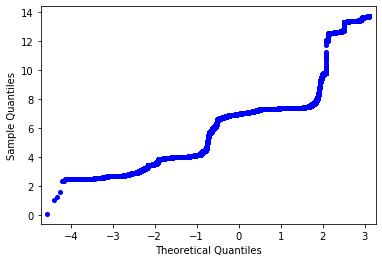

In [35]:
normality_plots("AIR121pH",BatchId=list_all_common_batchid,CurrentBlock=list_all_CurrentBlock,
                         measure="qqnorm")

In [36]:
normality_plots("AIR121pH",BatchId=list_all_common_batchid,CurrentBlock=list_all_CurrentBlock,
                         measure="shapiro")

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [37]:
normality_plots("AIR121pH",BatchId=list_all_common_batchid,CurrentBlock=list_all_CurrentBlock,
                         measure="Agostino")

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


(array([504.,  18., 243., 101.,   1.,   2., 111.,  30.,   0.,   1.]),
 array([6.90999985, 6.91499987, 6.91999989, 6.9249999 , 6.92999992,
        6.93499994, 6.93999996, 6.94499998, 6.95      , 6.95500002,
        6.96000004]),
 <a list of 10 Patch objects>)

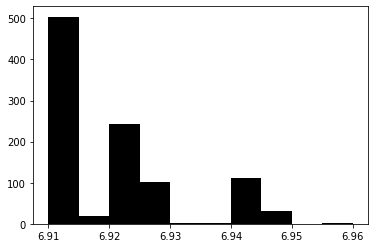

In [38]:
data=dpc_df.mask_one_equal('Batch',899032).mask_one_equal('CurrentBlock','FILTER_FILL')
plt.hist(data['AIR121pH'])

In [39]:
def subgroups_function(colname,BatchId=0,CurrentBlock="default"):
    # for loop will definately come when we will have more than one CurrentBlock for analysis
#     for current_block in CurrentBlock:
#         subgroup_df=dpc_df.mask_one_equal('CurrentBlock',current_block).mask_many_equal('Batch',BatchId)
        # Here CUSUM analysis will be done OR EWMA analysis will be done
#     Calculate sd/mean separately for each sample size.
#     subgroup_df=dpc_df.mask_one_equal('CurrentBlock',CurrentBlock).mask_many_equal('Batch',BatchId)[colname]
    subgroup_df=dpc_df.mask_one_equal('CurrentBlock',CurrentBlock).mask_one_equal('Batch',BatchId)[colname]
#     subgroup_df=dpc_df.mask_many_equal('Batch',BatchId)
    return subgroup_df
#     pd.DataFrame(cusum(subgroup_df,K=0.25)).plot()

## Exponential Weighted Moving Average (EWMA)

In [40]:
# rm = EWMAVariance(0.94)

## Understanding pyspc package

### Xbar-S chart using pyspc
### Data: One batch with one phase

(84, 10)


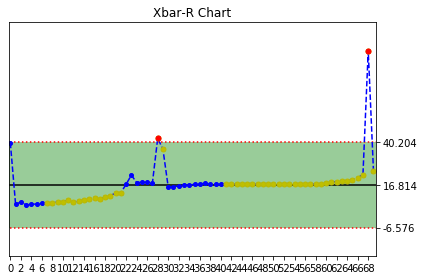

<pyspc: (119329930167)>


In [41]:
import numpy as np
pyspc_package=subgroups_function(objTOint_cols,BatchId=891813,CurrentBlock="Pre_use_Rinse_Inlet")
pyspc_ndarray=pyspc_package.values
# We can analyse maximum 10 multivariate using pyspc package. So we need to reduce the column size
reduced_pyspc_ndarray=np.delete(pyspc_ndarray, np.s_[1:5], axis=1)
print(reduced_pyspc_ndarray.shape)
# a = spc(reduced_pyspc_ndarray) + xbar_rbar() + rbar() + rules()
a = spc(reduced_pyspc_ndarray[:70]) + xbar_rbar() + rules()
print(a)

### CUSUM & EWMA Chart using pyspc package
### Data: One batch with one phase

Test
Value is 23.705817388576914 Batch Number is: 1
Value is 21.250561905538433 Batch Number is: 2
Value is 19.287371253730722 Batch Number is: 3
Value is 16.088344048461472 Batch Number is: 4
Value is 13.073980767730685 Batch Number is: 5
Value is 10.23458371607682 Batch Number is: 6
Value is 7.57769282780757 Batch Number is: 7
Value is 0 Batch Number is: 1
Value is -0.8591707396999793 Batch Number is: 2
Value is -1.226276648169188 Batch Number is: 3
Value is -2.8292191100999355 Batch Number is: 4
Value is -4.247497647492223 Batch Number is: 5
Value is -5.490809955807586 Batch Number is: 6


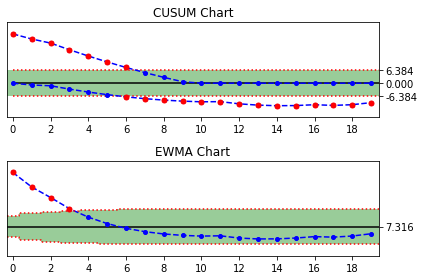

<pyspc: (119329914088)>


In [42]:
# pyspc_cols = dpc_df.columns.drop(['Date','UnitID','Batch','BatchID_Calc','CurrentBlock',
#                                     'AccTime','AccVolume','BlockTime','BlockVolume'])

pyspc_df=subgroups_function(objTOint_cols,BatchId=891813,CurrentBlock="Pre_use_Rinse_Inlet")
pyspc_cols = pyspc_df.columns.drop(['AccTime'])
# We can analyse maximum 10 multivariate using pyspc package. So we need to reduce the column size
a = spc(pyspc_df[pyspc_cols][:20]) + cusum() + ewma() + rules()
print(a)

### CUSUM by changing pyspc code
### Data: Batch wise

In [43]:
# def CUSUM_pyspc(data,std=None,target=None):
    
#     d2 = [0, 0, 1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078]
#     interval=4
#     data = np.mean(data, axis=1)
    
#     if target is None:
#         target = np.mean(data)
        
#     if std is None:
#         rbar = []
#     for i in range(len(data) - 1):
#         rbar.append(abs(data[i] - data[i + 1]))
#     std = np.mean(rbar) / d2[2]
#     k = std / 2
    
#     cplus = []  # values
#     cminus = []  # values
#     i, j = 0, 0
#     for xi in data:
#         cplus.append(max([0, xi - (target + k) + i]))
#         cminus.append(min([0, xi - (target - k) + j]))
#         i, j = cplus[-1], cminus[-1]

#     lcl = -interval * std
#     ucl = interval * std
#     center = 0
#     print(std,interval,ucl,lcl)
#     fig, axs = plt.subplots(2, figsize=(15,15))
# #     axs[0].plot([0, len(cplus)], [center, center], 'k-')
# #     axs[0].plot([0, len(cplus)], [lcl, lcl], 'r:')
# #     axs[0].plot([0, len(cplus)], [ucl, ucl], 'r:')
# #     axs[0].plot(cplus, 'bo--')
# #     axs[0].plot(cminus, 'bo--')
        
#     axs[0].plot([0, len(cplus)], [center, center], 'k-', linestyle='-', marker='o', color='black')
#     axs[0].plot([0, len(cplus)], [lcl, lcl], 'r:', color='red', linestyle='dashed')
#     axs[0].plot([0, len(cplus)], [ucl, ucl], 'r:', color='red', linestyle='dashed')
# #     axs[0].axhline(lcl, color='red', linestyle='dashed')
# #     axs[0].axhline(ucl, color='red', linestyle='dashed')
#     axs[0].plot(cplus, 'bo--', color='blue')
#     axs[0].plot(cminus, 'bo--',color='red')
#     axs[0].set_title('CUSUM Chart')
#     axs[0].set(xlabel='Group', ylabel='Mean')
    
# i = 0
# control = True
# for group in s:
#     if group > 1.593*statistics.mean(s) or group < 0.407*statistics.mean(s):
#         print('Group', i, 'out of standard deviation cotrol limits!')
#         control = False
#     i += 1
# if control == True:
#     print('All points within control limits.')
# ##--------Data reading---------------
# exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
#                  892914, 893971, 892374, 892151, 894649, 892762]
# Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
#                                    'AccVolume','BlockTime','BlockVolume'])
# Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

# Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

# Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
# Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()

# x=Xbar_S_new_df.values
# CUSUM_pyspc(x)

### EWMA by changing pyspc code
### Data: Batch wise

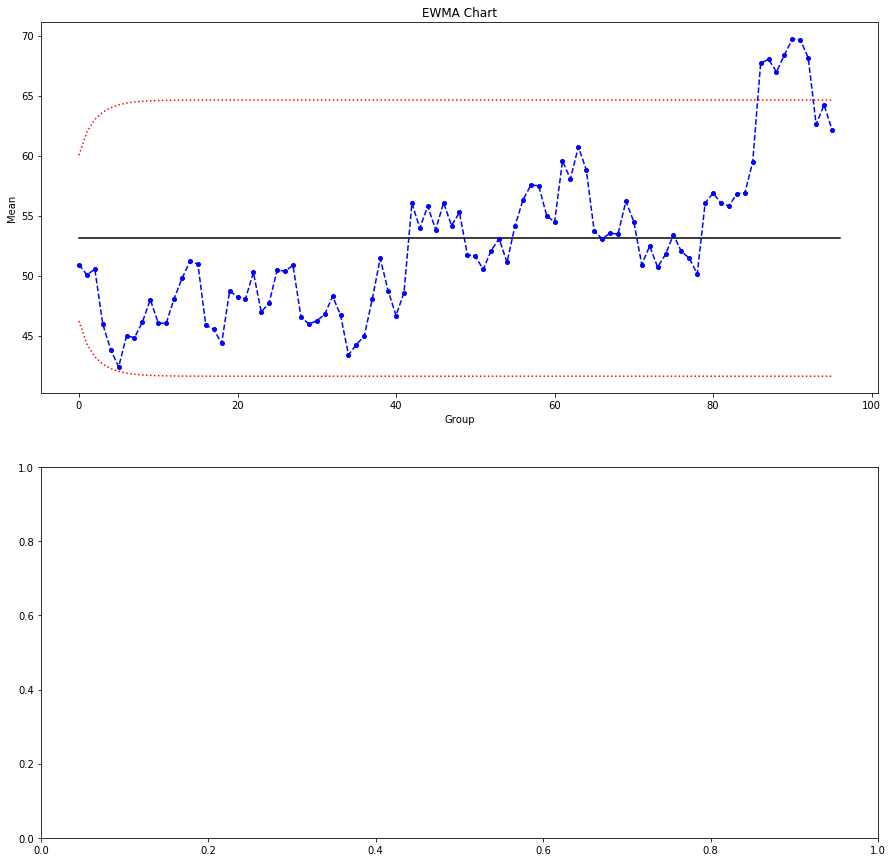

In [44]:
def EWMA_pyspc(data,weight=0.2,target=None):
    
    d2 = [0, 0, 1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078]
    data = np.mean(data, axis=1)
    
    if target is None:
        target = np.mean(data)
    rbar = []    
    for i in range(len(data) - 1):
        rbar.append(abs(data[i] - data[i + 1]))
    std = np.mean(rbar) / d2[2]
    
    ewma = []  # values
    i = target
    for x in data:
        ewma.append(weight * x + (1 - weight) * i)
        i = ewma[-1]
    
    lcl, ucl = [], []
    for i in range(1, len(data) + 1):
        lcl.append(target - 3 * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
        ucl.append(target + 3 * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
    
    
#     print(std,weight,ucl,lcl)
    fig, axs = plt.subplots(2, figsize=(15,15))
    axs[0].plot([0, len(ewma)], [target, target], 'k-')
    axs[0].plot(lcl, 'r:')
    axs[0].plot(ucl, 'r:')
    axs[0].plot(ewma, 'bo--')
        
#     axs[0].plot([0, len(cplus)], [center, center], 'k-', linestyle='-', marker='o', color='black')
#     axs[0].plot([0, len(cplus)], [lcl, lcl], 'r:', color='red', linestyle='dashed')
#     axs[0].plot([0, len(cplus)], [ucl, ucl], 'r:', color='red', linestyle='dashed')
#     axs[0].plot(cplus, 'bo--', color='blue')
#     axs[0].plot(cminus, 'bo--',color='red')
    axs[0].set_title('EWMA Chart')
    axs[0].set(xlabel='Group', ylabel='Mean')
    
##--------Data reading---------------
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
                                   'AccVolume','BlockTime','BlockVolume'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()

x=Xbar_S_new_df.values
EWMA_pyspc(x)

 ## using X chart & S chart for n>10
 source: https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

In [45]:
# # Set random seed
# np.random.seed(42)

# # Create dummy data
# # x = np.array([list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=13, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11)),
# #         list(np.random.normal(loc=10, scale=2, size=11))])

# x=pyspc_df.values
# # Define list variable for groups means
# x_bar = []

# # Define list variable for groups standard deviation
# s = [] 

# # Get and append groups means and standard deviations
# for group in x:
#     x_bar.append(group.mean())
#     s.append(np.std(group))
    
# # Plot x-bar and s charts
# fig, axs = plt.subplots(2, figsize=(15,15))

# # x-bar chart
# axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
# axs[0].axhline((statistics.mean(x_bar)+0.817*statistics.mean(s)), color='red', linestyle='dashed')
# axs[0].axhline((statistics.mean(x_bar)-0.817*statistics.mean(s)), color='red', linestyle='dashed')
# axs[0].axhline((statistics.mean(x_bar)), color='blue')
# axs[0].set_title('x-bar Chart')
# axs[0].set(xlabel='Group', ylabel='Mean')

# # s chart
# axs[1].plot(s, linestyle='-', marker='o', color='black')
# axs[1].axhline((1.593*statistics.mean(s)), color='red', linestyle='dashed')
# axs[1].axhline((0.407*statistics.mean(s)), color='red', linestyle='dashed')
# axs[1].axhline((statistics.mean(s)), color='blue')
# axs[1].set_title('s Chart')
# axs[1].set(xlabel='Group', ylabel='Range')

# # Validate points out of control limits for x-bar chart
# i = 0
# control = True
# for group in x_bar:
#     if group > statistics.mean(x_bar)+0.817*statistics.mean(s) or group < statistics.mean(x_bar)-0.817*statistics.mean(s):
#         print('Group', i, 'out of mean control limits!')
#         control = False
#     i += 1
# if control == True:
#     print('All points within control limits.')
    
# # Validate points out of control limits for s chart
# i = 0
# control = True
# for group in s:
#     if group > 1.593*statistics.mean(s) or group < 0.407*statistics.mean(s):
#         print('Group', i, 'out of standard deviation cotrol limits!')
#         control = False
#     i += 1
# if control == True:
#     print('All points within control limits.')

## Xbar-S chart Subgroup: mean of all Batch as one with 14 subgroups (variables)

All points within control limits.
Group 0 out of standard deviation cotrol limits!
Group 5 out of standard deviation cotrol limits!
Group 10 out of standard deviation cotrol limits!
Group 23 out of standard deviation cotrol limits!
Group 28 out of standard deviation cotrol limits!
Group 29 out of standard deviation cotrol limits!
Group 39 out of standard deviation cotrol limits!
Group 45 out of standard deviation cotrol limits!
Group 75 out of standard deviation cotrol limits!


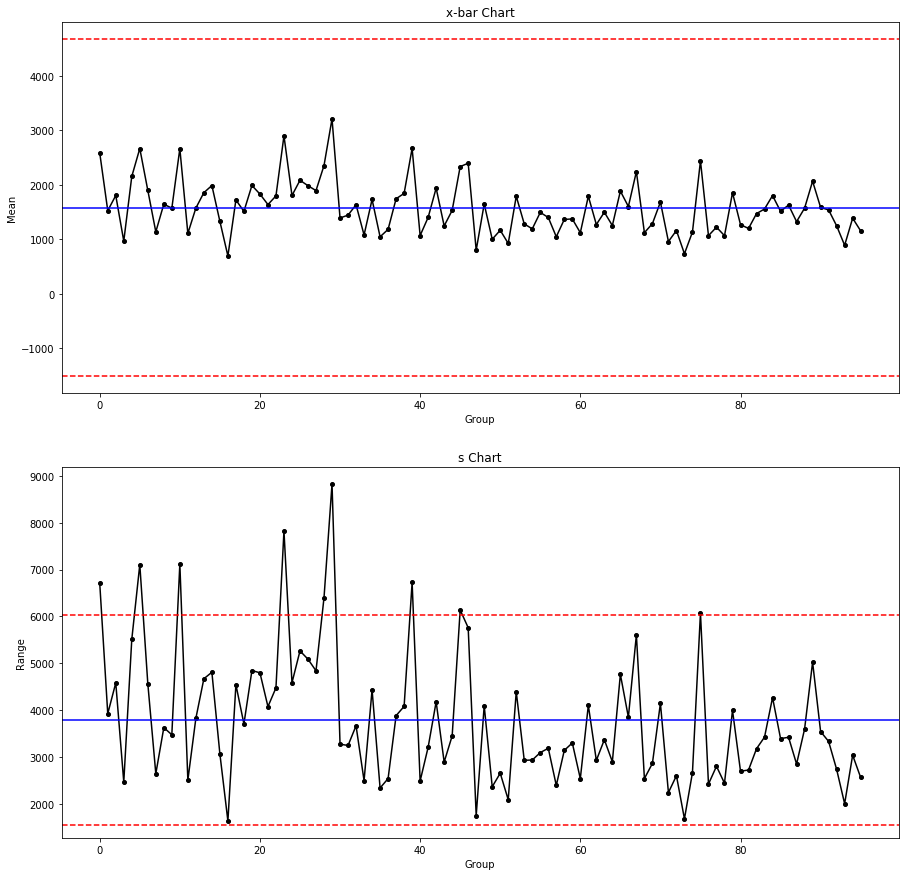

In [46]:
import numpy as np

exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()

x=Xbar_S_new_df.values
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = [] 

# Get and append groups means and standard deviations
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))
    
# Plot x-bar and s charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.817*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.817*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# s chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((1.593*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((0.407*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(s)), color='blue')
axs[1].set_title('s Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.817*statistics.mean(s) or group < statistics.mean(x_bar)-0.817*statistics.mean(s):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for s chart
i = 0
control = True
for group in s:
    if group > 1.593*statistics.mean(s) or group < 0.407*statistics.mean(s):
        print('Group', i, 'out of standard deviation cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

## Xbar-R chart Subgroup: mean of Batch as one with 10 subgroups (variables) without ['AccTime','AccVolume','BlockTime','BlockVolume']

All points within control limits.
Group 86 out of range cotrol limits!


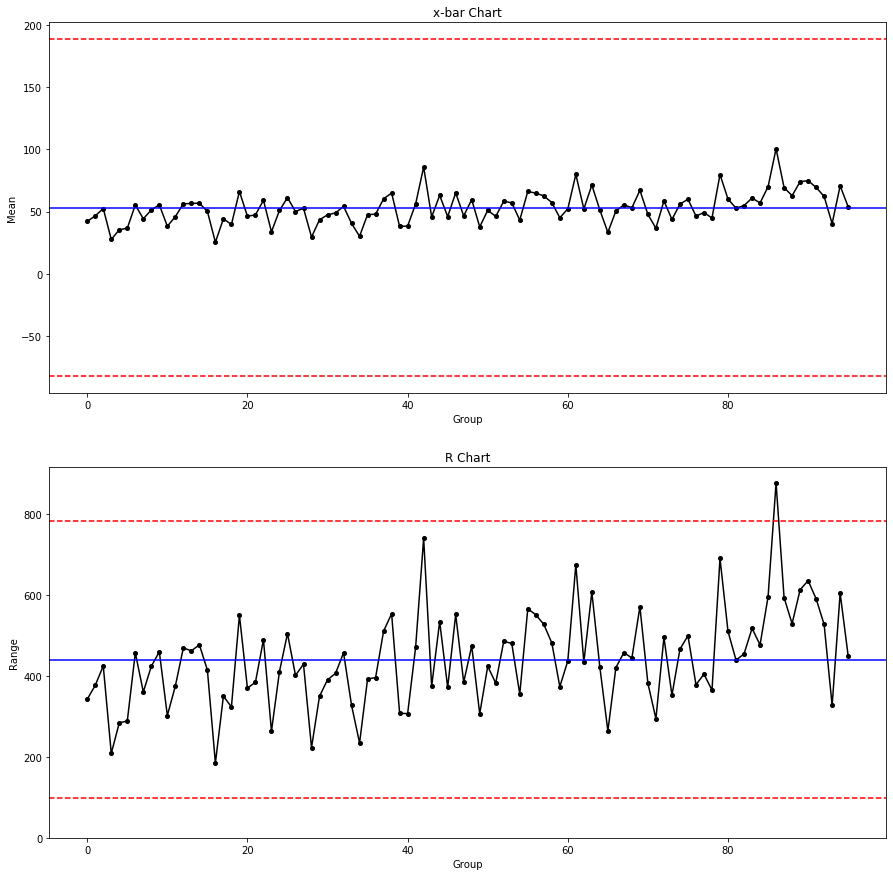

In [47]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
                                   'AccVolume','BlockTime','BlockVolume'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()

x=Xbar_S_new_df.values
        
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
A2=0.308
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
D4=1.777
D3=0.223
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r) or group < D3*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

## Xbar-R chart Subgroup: mean of [*Batch & phase*] as one with 10 subgroups (variables) without ['AccTime','AccVolume','BlockTime','BlockVolume']

All points within control limits.
Group 6 out of range cotrol limits!
Group 13 out of range cotrol limits!


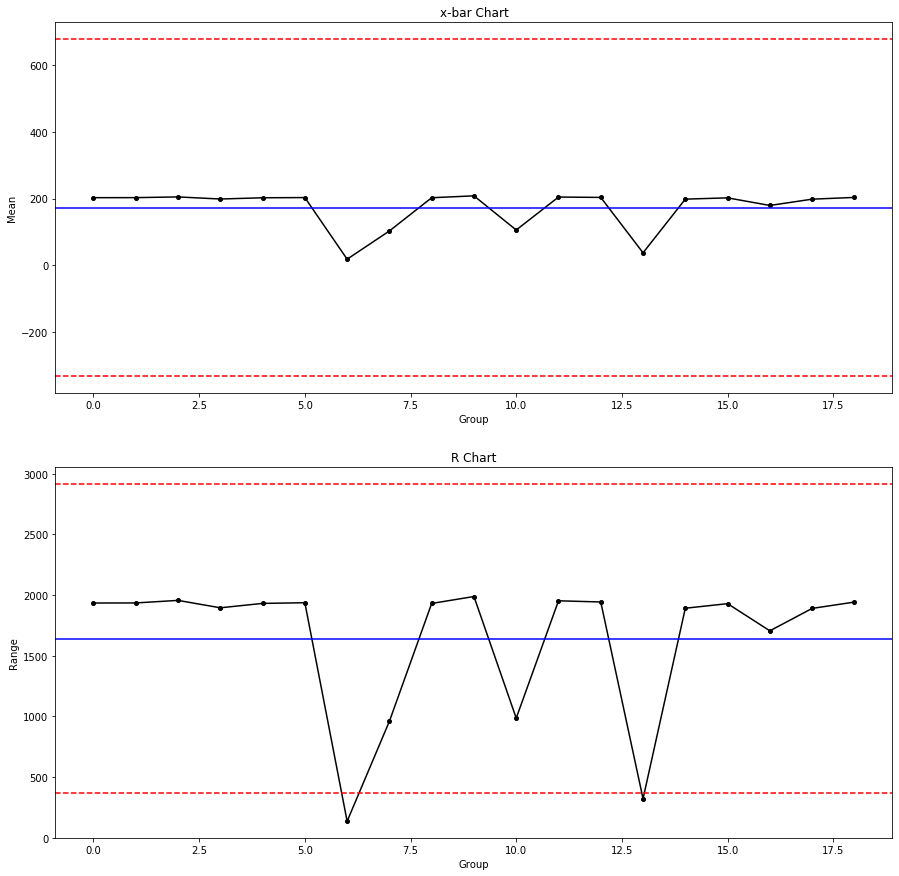

In [48]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','AccTime',
                                   'AccVolume','BlockTime','BlockVolume'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
Xbar_S_df=Xbar_S_df.mask_one_equal('CurrentBlock','Block_SODIUM_CITRATE_PH_5_WASH')
Except_Batch_cols = Xbar_S_df.columns.drop(['Batch','CurrentBlock'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()

# x=Xbar_S_new_df.values
x=Xbar_S_new_df.values
        
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
A2=0.308
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
D4=1.777
D3=0.223
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r) or group < D3*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

## CUSUM+EWMA using pyspc: on data: with 96 unique batch id (number of subgroups) to form subgroup size (10) by removing columns ['AccTime','AccVolume','BlockTime','BlockVolume'].

In [49]:
Xbar_S_new_df

,AIR101,AIR121pH,AIR131UV,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
Batch,,,,,,,,,,
899032,12.506412,5.181594,0.000000,1934.657140,1.728240,1.823899,0.036524,0.0,53.344110,19.099932
900605,12.561801,5.529169,0.073762,1935.282731,1.697072,1.804396,0.080000,0.0,53.520835,19.594090
900889,12.446948,5.538405,0.058342,1956.284219,1.767445,1.868877,0.000000,0.0,53.872514,19.369055
901586,12.215888,5.607411,0.000000,1895.301144,1.691700,1.787681,0.052762,0.0,52.047823,19.805900
902108,12.092851,5.589093,0.000000,1931.560913,1.711793,1.840801,0.070000,0.0,53.291411,19.649508
902780,12.078763,5.570294,0.083958,1936.962057,1.751627,1.867275,0.058613,0.0,53.715826,19.667918
905983,17.140541,6.611637,0.056172,136.432561,0.134611,0.179865,0.071811,0.0,3.717929,19.384319
907645,14.270615,5.919065,0.000000,960.244525,0.907880,0.943190,0.091638,0.0,28.790925,19.304548
920021,12.464847,6.792284,0.085923,1931.037558,1.836654,1.910687,0.000000,0.0,53.208868,19.546748


Test
Value is 64.89265099581738 Batch Number is: 87
Value is 75.37117515916027 Batch Number is: 88
Value is 79.27013295002524 Batch Number is: 89
Value is 94.45756902349346 Batch Number is: 90
Value is 110.47219739729533 Batch Number is: 91
Value is 121.0692380346687 Batch Number is: 92
Value is 124.39584597565401 Batch Number is: 93
Value is 105.84147514112665 Batch Number is: 94
Value is 117.70214578949654 Batch Number is: 95
Value is 112.71078643737522 Batch Number is: 96
Value is -5.26444549354283 Batch Number is: 1
Value is -6.046210340150083 Batch Number is: 2
Value is -0.9274393643384471 Batch Number is: 3
Value is -20.735676631985033 Batch Number is: 4
Value is -32.7099321873319 Batch Number is: 5
Value is -43.456985721811506 Batch Number is: 6
Value is -35.504111939861424 Batch Number is: 7
Value is -38.655503883154005 Batch Number is: 8
Value is -34.66279285484701 Batch Number is: 9
Value is -26.569920675110367 Batch Number is: 10
Value is -35.7237020709831 Batch Number is: 1

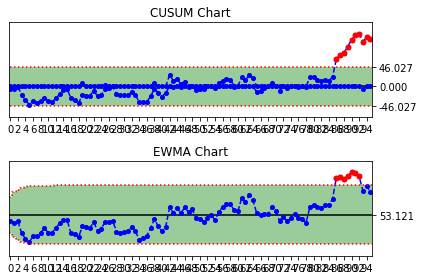

<pyspc: (-9223371917528022868)>


In [50]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
                                   'AccVolume','BlockTime','BlockVolume'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()
# x=Xbar_S_new_df.values

# pyspc_df=subgroups_function(objTOint_cols,BatchId=891813,CurrentBlock="Pre_use_Rinse_Inlet")
# pyspc_cols = pyspc_df.columns.drop(['AccTime'])
# We can analyse maximum 10 multivariate using pyspc package. So we need to reduce the column size
a = spc(Xbar_S_new_df) + cusum() + ewma() + rules()
# a = spc(Xbar_S_new_df[:30])
print(a)

## MEWMA using pyspc: on data: with 96 unique batch id (number of subgroups) to form subgroup size (9) by removing columns ['AccTime','AccVolume','BlockTime','BlockVolume','PU313'].

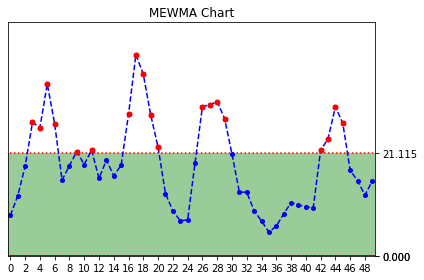

<pyspc: (119324514694)>


In [51]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
                                   'AccVolume','BlockTime','BlockVolume','PU313'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()


# x=Xbar_S_new_df.values

# pyspc_df=subgroups_function(objTOint_cols,BatchId=891813,CurrentBlock="Pre_use_Rinse_Inlet")
# pyspc_cols = pyspc_df.columns.drop(['AccTime'])
# We can analyse maximum 10 multivariate using pyspc package. So we need to reduce the column size
a = spc(Xbar_S_new_df[:50]) + mewma() + rules()
print(a)

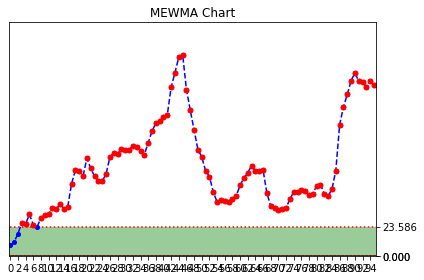

<pyspc: (119450545798)>


In [52]:
a = spc(Xbar_S_new_df[:]) + mewma(lambd=0.05) + rules()
print(a)

### Max-EWMA by changing pyspc code
### Data: Batch wise

In [53]:
# print(Xbar_S_new_df.values.mean(axis=0))
# print(Xbar_S_new_df.mean(axis=0))
# v[i] = data[i + 1] - data[i]
# v
# data=Xbar_S_new_df.copy()
data=Xbar_S_new_df.values
v = np.zeros(shape=(96 - 1, 9))
Xbar_S_new_df.shape
# Xbar_S_new_df.values[1]
for i in range(96 - 1):
    v[i] = data[i + 1] - data[i]
s = np.zeros(shape=(9, 9))
vv = v.T @ v
for i in range(9):
    s[i] = (1 / (2 * (96 - 1))) * (vv[i])

           AIR101  AIR121pH  AIR131UV      FIR141     Pdiff    PIR111  \
Batch                                                                   
899032  34.902356  6.501977  3.813234  342.193416  0.387494  0.396546   

          PIR112      PU351     TIR101  
Batch                                   
899032  0.038492  10.417423  18.832865  
Index(['AIR121pH', 'AIR131UV', 'Pdiff', 'PIR111', 'PIR112', 'PU351'], dtype='object')


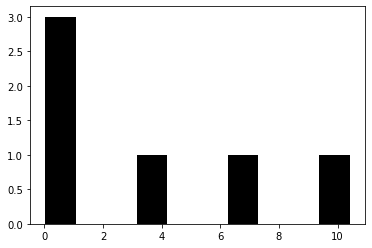

In [54]:
# print(Xbar_S_new_df[:5].columns)
print(Xbar_S_new_df[:1])
# data = np.mean(Xbar_S_new_df[:5], axis=1)
# print(data)
exclude_cols=Xbar_S_new_df.columns.drop(['AIR101','FIR141','TIR101'])
print(exclude_cols)
plt.hist(Xbar_S_new_df[:1][exclude_cols])
plt.show()

## Correlation between Variables
Aim: Find out the correlation between variables & find out the 
most strongly correlated variable with difference of input & output or yield.

### Non parametric Correlation steps

In [55]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
# Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
#                                    'AccVolume','BlockTime','BlockVolume'])
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

in_out_df['difference_out']=in_out_df['Output']-in_out_df['Input']
in_out_df['difference_in']=in_out_df['Input']-in_out_df['Output']
in_out_df = in_out_df.rename(columns={'Batch ID': 'Batch'})
# Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch']).mean()
Xbar_S_new_df=Xbar_S_new_df.reset_index()

In [56]:
correlation_df=pd.merge(Xbar_S_new_df, in_out_df, on='Batch')
# correlation_df.shape
correlation_cols=correlation_df.columns.drop(['Output', 'Input', 'Batch ID.1', 'Yeild', 
                                              'difference_in','Batch'])
corr = correlation_df[correlation_cols].corr()
corr

,AccTime,AccVolume,AIR101,AIR121pH,AIR131UV,BlockTime,BlockVolume,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101,difference_out
AccTime,1.000000,0.910692,0.197841,-0.142696,-0.064534,-0.001472,-0.088298,-0.112155,-0.031455,-0.027443,0.160125,-0.118617,-0.116728,0.088098,0.194777
AccVolume,0.910692,1.000000,0.106321,-0.082932,0.068648,0.094441,0.080622,0.040146,0.080771,0.075610,0.081820,0.032186,0.034752,-0.082746,0.143337
AIR101,0.197841,0.106321,1.000000,-0.347139,0.359769,0.348195,0.268952,0.622737,0.528805,0.537918,0.189543,0.480616,0.634876,-0.330717,-0.049123
AIR121pH,-0.142696,-0.082932,-0.347139,1.000000,0.133530,0.135121,0.120773,-0.083356,0.033462,0.029468,-0.095268,0.055214,-0.091542,-0.012858,0.257658
AIR131UV,-0.064534,0.068648,0.359769,0.133530,1.000000,0.917083,0.900404,0.837554,0.868650,0.866227,0.222787,0.927220,0.823579,-0.863321,-0.143463
BlockTime,-0.001472,0.094441,0.348195,0.135121,0.917083,1.000000,0.966706,0.746582,0.822471,0.814198,0.215995,0.865465,0.728212,-0.782338,-0.114845
BlockVolume,-0.088298,0.080622,0.268952,0.120773,0.900404,0.966706,1.000000,0.764986,0.789068,0.776109,0.129245,0.878843,0.747268,-0.802888,-0.185500
FIR141,-0.112155,0.040146,0.622737,-0.083356,0.837554,0.746582,0.764986,1.000000,0.913340,0.912281,0.181468,0.935663,0.997731,-0.816347,-0.167400
Pdiff,-0.031455,0.080771,0.528805,0.033462,0.868650,0.822471,0.789068,0.913340,1.000000,0.993773,0.211529,0.905847,0.902785,-0.771800,-0.088336
PIR111,-0.027443,0.075610,0.537918,0.029468,0.866227,0.814198,0.776109,0.912281,0.993773,1.000000,0.284340,0.904793,0.901406,-0.765858,-0.092231


In [57]:
from scipy.stats import spearmanr
def correlation_variable():
    data1=correlation_df['difference_in']
    correlation_cols=correlation_df.columns.drop(['Output', 'Input', 'Batch ID.1', 'Yeild', 
                                          'difference_out', 'difference_in','Batch'])
    for data2 in correlation_cols:
        print("----------Column difference_out Vs",data2,"-------------------\n")
        coef, p = spearmanr(data1, correlation_df[data2])
        print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
        alpha = 0.05
        if p > alpha or abs(coef) < 0.5:
            print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        else:
            print('Samples are correlated (reject H0) p=%.3f' % p)
correlation_variable()

----------Column difference_out Vs AccTime -------------------

Spearmans correlation coefficient: -0.227
Samples are uncorrelated (fail to reject H0) p=0.026
----------Column difference_out Vs AccVolume -------------------

Spearmans correlation coefficient: -0.162
Samples are uncorrelated (fail to reject H0) p=0.115
----------Column difference_out Vs AIR101 -------------------

Spearmans correlation coefficient: 0.018
Samples are uncorrelated (fail to reject H0) p=0.864
----------Column difference_out Vs AIR121pH -------------------

Spearmans correlation coefficient: -0.169
Samples are uncorrelated (fail to reject H0) p=0.099
----------Column difference_out Vs AIR131UV -------------------

Spearmans correlation coefficient: 0.093
Samples are uncorrelated (fail to reject H0) p=0.365
----------Column difference_out Vs BlockTime -------------------

Spearmans correlation coefficient: 0.070
Samples are uncorrelated (fail to reject H0) p=0.500
----------Column difference_out Vs BlockVolu

In [58]:
columns = np.full((corr.shape[0],), False, dtype=bool)
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [59]:
correlation_cols=correlation_df.columns.drop(['Output', 'Input', 'Batch ID.1', 'Yeild', 
                                              'difference_in','Batch'])
correlation_new_df = correlation_df[correlation_cols]
corr = correlation_df[correlation_cols].corr()
columns = np.full((corr.shape[0],), False, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.5:
            if columns[j]==False:
                columns[j] = True
selected_columns = correlation_new_df.columns[columns]
data = correlation_new_df[selected_columns]
data

,AccVolume,BlockTime,BlockVolume,FIR141,Pdiff,PIR111,PU313,PU351,TIR101
0,8889.389425,1060.664111,453.844240,342.193416,0.387494,0.396546,3.543671,10.417423,18.832865
1,4476.733591,1002.407196,372.142126,376.461716,0.410545,0.446476,3.667563,11.602020,18.885591
2,5642.382813,1170.055402,431.141913,424.252705,0.466946,0.486851,4.226087,13.096233,19.009996
3,3115.682854,566.903979,210.411452,208.385996,0.236974,0.247349,2.072368,6.271203,19.187416
4,8290.989019,695.827786,301.059062,283.854690,0.306299,0.326980,2.919798,8.856330,18.914315
...,...,...,...,...,...,...,...,...,...
91,5183.853916,2286.428737,922.569289,590.031498,0.588864,0.599479,6.726670,18.149723,17.275374
92,4594.177951,1472.197812,660.753849,526.733178,0.490231,0.544789,5.964236,15.848592,17.742969
93,3396.254619,890.400454,398.483989,326.669346,0.299089,0.318031,3.652497,9.647458,18.694172
94,5185.123363,1605.799984,711.436237,603.834437,0.572686,0.590576,6.837027,18.223819,17.556752


In [60]:
# selected_columns = selected_columns[1:].values
selected_columns = selected_columns[1:]
import statsmodels.formula.api as sm
import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, 
                                                     data.iloc[:,0].values, SL, selected_columns)

In [61]:
result = pd.DataFrame()
result['AccVolume'] = data.iloc[:,0]
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [62]:
correlation_df

,Batch,AccTime,AccVolume,AIR101,AIR121pH,AIR131UV,BlockTime,BlockVolume,FIR141,Pdiff,...,PIR112,PU313,PU351,TIR101,Output,Input,Batch ID.1,Yeild,difference_out,difference_in
0,899032,25346.165185,8889.389425,34.902356,6.501977,3.813234,1060.664111,453.844240,342.193416,0.387494,...,0.038492,3.543671,10.417423,18.832865,2452.05,2731,899032,90,-278.95,278.95
1,899409,15065.521765,4476.733591,43.465678,6.518185,4.346637,1002.407196,372.142126,376.461716,0.410545,...,0.049869,3.667563,11.602020,18.885591,2232.20,2559,899409,87,-326.80,326.80
2,899641,17493.569421,5642.382813,52.099919,6.558933,4.613714,1170.055402,431.141913,424.252705,0.466946,...,0.048255,4.226087,13.096233,19.009996,2497.16,2677,899641,93,-179.84,179.84
3,900105,9389.431578,3115.682854,31.772119,4.883546,2.510215,566.903979,210.411452,208.385996,0.236974,...,0.022370,2.072368,6.271203,19.187416,2259.81,2454,900105,92,-194.19,194.19
4,900605,20511.845382,8290.989019,28.645600,6.189412,3.863402,695.827786,301.059062,283.854690,0.306299,...,0.052547,2.919798,8.856330,18.914315,2000.58,2016,900605,99,-15.42,15.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,954649,12466.238070,5183.853916,44.474781,6.571104,10.243639,2286.428737,922.569289,590.031498,0.588864,...,0.049481,6.726670,18.149723,17.275374,2698.70,2808,954649,96,-109.30,109.30
92,954659,10133.839016,4594.177951,41.064002,6.293527,7.271993,1472.197812,660.753849,526.733178,0.490231,...,0.052767,5.964236,15.848592,17.742969,2575.45,2691,954659,96,-115.55,115.55
93,955041,7394.581696,3396.254619,32.506382,6.941425,4.430945,890.400454,398.483989,326.669346,0.299089,...,0.037152,3.652497,9.647458,18.694172,2607.51,2872,955041,91,-264.49,264.49
94,955059,11222.610193,5185.123363,45.469295,6.580647,7.625472,1605.799984,711.436237,603.834437,0.572686,...,0.056202,6.837027,18.223819,17.556752,2542.87,2818,955059,90,-275.13,275.13


###  Parametric Correlation steps

In [63]:
# plt.scatter(correlation_df['Yeild'], correlation_df['AIR121pH'])
# plt.show() # not much correlation
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# USING COVARIANCE
# covariance = cov(correlation_df['Yeild'], correlation_df['AIR121pH'])
# print(covariance)

# USING PEARSONR
# corr, _ = pearsonr(correlation_df['Yeild'], correlation_df['AIR121pH'])
# print('Pearsons correlation: %.3f' % corr)

# USING SPEARMANR
from scipy.stats import spearmanr
corr, _ = spearmanr(correlation_df['difference_out'], correlation_df['AIR121pH'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.169


## Normality Test
Shapiro test

In [64]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

# 'AIR101', 'AIR121pH', 'AIR131UV', 'Yeild', 'difference_out', 'difference_in'
data=correlation_df['difference_in']
print("-------------------Shapiro-Wilk Test----------------------\n") 
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print("\n-------------------D’Agostino’s K^2 Test----------------------\n")    
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

print("\n-------------------Anderson-Darling Test----------------------\n")    
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

-------------------Shapiro-Wilk Test----------------------

Statistics=0.985, p=0.370
Sample looks Gaussian (fail to reject H0)

-------------------D’Agostino’s K^2 Test----------------------

Statistics=2.462, p=0.292
Sample looks Gaussian (fail to reject H0)

-------------------Anderson-Darling Test----------------------

Statistic: 0.373
15.000: 0.554, data looks normal (fail to reject H0)
10.000: 0.631, data looks normal (fail to reject H0)
5.000: 0.757, data looks normal (fail to reject H0)
2.500: 0.884, data looks normal (fail to reject H0)
1.000: 1.051, data looks normal (fail to reject H0)


## Outlier test

In [65]:
from numpy import percentile

# 'AIR101', 'AIR121pH', 'AIR131UV', 'Yeild', 'difference_out', 'difference_in'
data=correlation_df['difference_in']

q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=141.483, 75th=264.997, IQR=123.515
Identified outliers: 0
Non-outlier observations: 96


## Finding Correlation between Phases of each batch

In [66]:
from scipy.stats import spearmanr

def correlation_variable(data1,currentblock):
    correlation_cols=data1.columns.drop(['difference_out'])
    print("Currentblock:",color.BOLD +currentblock+ color.END + "\n")
    for data_2 in correlation_cols:
        coef, p = spearmanr(data1['difference_out'], data1[data_2])
#         print('Spearmans correlation coefficient: %.3f' % coef)
        alpha = 0.05
        if p > alpha or abs(coef) < 0.5:
            pass
#             print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        else:
#             print('Samples are correlated (reject H0) p=%.3f' % p)
            print("Samples are correlated with Column:",color.BOLD +data_2+color.END +"\n")
    print("-------------------------------------------------------------------------------")

In [67]:
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','PU313'])
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
list_all_CurrentBlock=list(Xbar_S_df.CurrentBlock.value_counts().index)

for currenblock in list_all_CurrentBlock:
    phase_corr_df=Xbar_S_df.mask_one_equal('CurrentBlock',currenblock).groupby(['Batch']).mean().reset_index()
    correlation_df=pd.merge(phase_corr_df, in_out_df, on='Batch')
    correlation_cols=correlation_df.columns.drop(['Output', 'Input', 'Batch ID.1', 'difference_in', 'Yeild',
                                                  'Batch'])
    correlation_df=correlation_df[correlation_cols]
    correlation_variable(correlation_df,currenblock)

Currentblock: FILTER_FILL

-------------------------------------------------------------------------------
Currentblock: LOADING

-------------------------------------------------------------------------------
Currentblock: EQUILIBRATION

-------------------------------------------------------------------------------
Currentblock: Column_Storage_Removal

-------------------------------------------------------------------------------
Currentblock: RECIRCULATION_GUANIDINE

Samples are correlated with Column: AIR101

-------------------------------------------------------------------------------
Currentblock: COLUMN_STORAGE

-------------------------------------------------------------------------------
Currentblock: Setup_Column_Cleaning_Post_Use

-------------------------------------------------------------------------------
Currentblock: Skid_clean_post_use

-------------------------------------------------------------------------------
Currentblock: MOCK_ELUTION

---------------------

Currentblock: Pre_use_Rinse_Airtrap

-------------------------------------------------------------------------------
Currentblock: CLEAN_AIRTRAP

-------------------------------------------------------------------------------
Currentblock: STORAGE_AIRTRAP

-------------------------------------------------------------------------------
Currentblock: CLEAN_INLET

-------------------------------------------------------------------------------
Currentblock: STORAGE_RECIRCULATION_VALVE

-------------------------------------------------------------------------------
Currentblock: Recirculation_NaOH_Pre_Use

Samples are correlated with Column: AccTime

Samples are correlated with Column: AccVolume

Samples are correlated with Column: AIR101

Samples are correlated with Column: AIR121pH

Samples are correlated with Column: AIR131UV

Samples are correlated with Column: BlockTime

Samples are correlated with Column: BlockVolume

Samples are correlated with Column: FIR141

Samples are correlated 

Currentblock: SODIUM_CITRATE_PH_5_WASH

Samples are correlated with Column: AccTime

Samples are correlated with Column: AccVolume

Samples are correlated with Column: AIR101

Samples are correlated with Column: AIR121pH

Samples are correlated with Column: AIR131UV

Samples are correlated with Column: BlockTime

Samples are correlated with Column: BlockVolume

Samples are correlated with Column: FIR141

Samples are correlated with Column: Pdiff

Samples are correlated with Column: PIR111

Samples are correlated with Column: PIR112

Samples are correlated with Column: PU351

Samples are correlated with Column: TIR101

-------------------------------------------------------------------------------


In [68]:
from scipy.stats import spearmanr
# correlation_dict=correlation_dict.fromkeys(list(correlation_cols))
correlation_dict = {}
# outlier_dict['Batch']=batch_id
def correlation_variable(data1,currentblock):
    correlation_cols=data1.columns.drop(['difference_in'])
    correlation_dict['CurrentBlock']=currentblock
#     print("Currentblock:",color.BOLD +currentblock+ color.END + "\n")
    for data_2 in correlation_cols:
        coef, p = spearmanr(data1['difference_in'], data1[data_2])
#         print('Spearmans correlation coefficient: %.3f' % coef)
        alpha = 0.05
        if p > alpha or abs(coef) < 0.5:
            correlation_dict[data_2]="Uncorrelated"
#             print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        else:
            print(coef)
#             correlation_dict[data_2].append("Correlated")
            correlation_dict[data_2]="Correlated"
    
    
    return correlation_dict
#             print('Samples are correlated (reject H0) p=%.3f' % p)
#             print("Samples are correlated with Column:",color.BOLD +data_2+color.END +"\n")
#     print("-------------------------------------------------------------------------------")

Column: AIR101


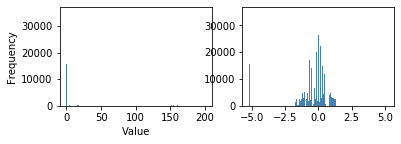

Column: AIR121pH


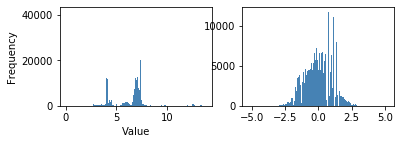

Column: AIR131UV


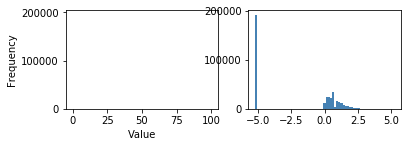

Column: FIR141


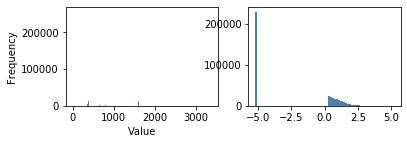

Column: Pdiff


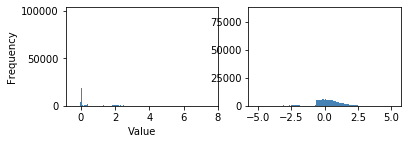

Column: PIR111


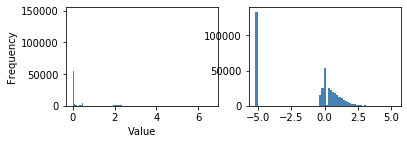

Column: PIR112


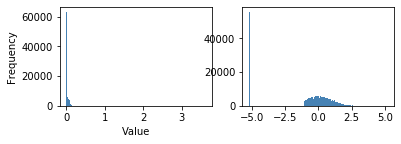

Column: PU313


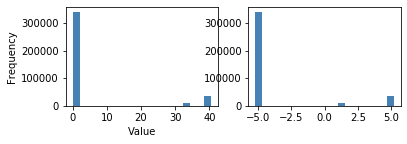

Column: PU351


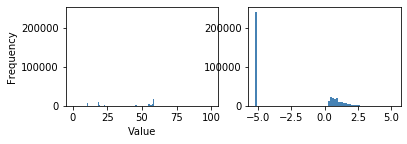

Column: TIR101


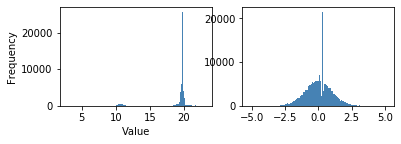

(387942, 12)


,Batch,AIR101,AIR121pH,AIR131UV,CurrentBlock,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
75621,899032,0.9938,-1.189522,-5.199338,,-5.199338,-1.072973,-5.199338,-5.199338,-5.199338,-5.199338,-0.436431
75622,899032,0.9938,-1.189522,-5.199338,Setup,-5.199338,-1.072973,-5.199338,-5.199338,-5.199338,-5.199338,-0.380478
75623,899032,0.9938,-1.189522,-5.199338,Setup,-5.199338,-1.072973,-5.199338,-5.199338,-5.199338,-5.199338,-0.566269
75624,899032,0.9938,-1.189522,-5.199338,Setup,-5.199338,-1.072973,-5.199338,-5.199338,-5.199338,-5.199338,-0.407389
75625,899032,0.9938,-1.189522,-5.199338,Setup,-5.199338,-1.072973,-5.199338,-5.199338,-5.199338,-5.199338,-0.440874


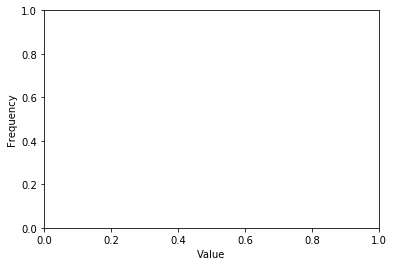

In [430]:
# We will apply Box-Cox transformation as all the data is Exponential. So it needs log transform.
# we can use the Box-Cox to perform the log transform by setting lambda explicitly to 0.
from sklearn.preprocessing import QuantileTransformer
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','AccTime','AccVolume','BlockTime','BlockVolume'])
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
Xbar_new_cols = Xbar_S_df.columns.drop(['Batch','CurrentBlock'])
for cols in Xbar_new_cols:
    qt = QuantileTransformer(output_distribution='normal')
    no = qt.fit_transform(Xbar_S_df[cols].values.reshape(-1, 1))
#     data=boxcox(Zero_df[cols], 0)
    print("Column:",cols)
    plt.subplot(2, 2, 1)
    plt.hist(Xbar_S_df[cols], bins='auto',color = "steelblue")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.subplot(2, 2, 2)
    plt.hist(no, bins='auto',color = "steelblue")
    plt.show()
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    Xbar_S_df[cols]=no
print(Xbar_S_df.shape)
Xbar_S_df.head()

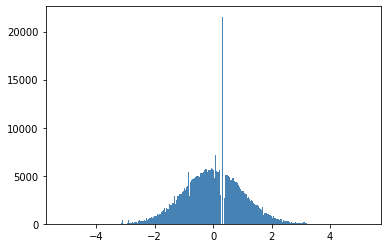

In [428]:
plt.hist(no, bins='auto',color = "steelblue")
plt.show()

,Batch,AIR101,AIR121pH,AIR131UV,CurrentBlock,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
75621,899032,20.200001,4.040000,0.0,,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.544573
75622,899032,20.200001,4.040000,0.0,Setup,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.563358
75623,899032,20.200001,4.040000,0.0,Setup,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.502754
75624,899032,20.200001,4.040000,0.0,Setup,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.554283
75625,899032,20.200001,4.040000,0.0,Setup,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.543154
...,...,...,...,...,...,...,...,...,...,...,...,...
482693,955203,22.409147,4.545153,0.0,STORAGE_AIRTRAP,2826.380371,0.400418,0.704207,0.348748,0.0,76.038971,19.942112
482694,955203,24.259554,4.550000,0.0,STORAGE_COLUMN_TUBING,2136.468506,0.494498,0.642022,0.169115,0.0,61.077805,19.954254
482695,955203,21.799999,4.540000,0.0,STORAGE_OUTLET,2027.440552,0.307134,0.365804,0.159614,0.0,58.657524,19.918997
482696,955203,21.799999,4.550000,0.0,STORAGE_OUTLET,2013.431641,0.276643,0.322086,0.150113,0.0,58.241104,19.919905


In [120]:
# Xbar_new_cols = Xbar_S_df.columns.drop(['Batch','CurrentBlock'])
# Weights_df=Final_Correlation_df.abs().mean(axis=1)
# weight_batch_df=Xbar_S_df.groupby(['Batch','CurrentBlock']).mean()
# test_df=weight_batch_df.reset_index()
# test_df=test_df.mask_many_equal('CurrentBlock',Weights_df.index)
# Batch_un_ls=Xbar_S_df['Batch'].unique().tolist()
# Batch_dict={}

# Imp_cols_ls=['AIR101','AIR121pH','PIR112','TIR101']
# Final1_Weighted_df=pd.DataFrame()
# for batch in Batch_un_ls:
#     Phase_un_ls=test_df.mask_one_equal('Batch',batch)['CurrentBlock'].unique().tolist()
#     cols_dict={}
#     cols_dict['Batch']=batch
#     for cols in Xbar_new_cols:
#         Col_phase_ls=[]
#         for phase in Phase_un_ls:
#             Col_phase_ls.append(float(test_df.mask_one_equal('Batch',batch).mask_one_equal('CurrentBlock',phase)[cols]*Weights_df[phase]))
#         cols_dict[cols]=statistics.mean(Col_phase_ls)
#     Final1_Weighted_df=Final1_Weighted_df.append(cols_dict,ignore_index=True)

In [121]:
# Final1_Weighted_df

,AIR101,AIR121pH,AIR131UV,Batch,FIR141,PIR111,PIR112,PU313,PU351,Pdiff,TIR101
0,7.932274,1.262699,0.673871,899032.0,182.424427,0.118544,0.011827,0.126388,6.171464,0.107091,3.612095
1,8.824770,1.023875,0.777450,899409.0,180.620240,0.115353,0.017381,0.145465,5.753434,0.099751,3.572309
2,9.100679,1.317672,0.754915,899641.0,188.837215,0.107987,0.015028,0.140176,6.120178,0.097598,3.597274
3,8.831559,0.910983,0.903211,900105.0,178.868247,0.109766,0.014837,0.145465,5.884541,0.098170,3.466659
4,7.062501,0.983023,0.724629,900605.0,169.368447,0.112188,0.018603,0.151170,5.545366,0.098387,3.533959
5,8.190109,1.305561,0.680191,900889.0,183.525463,0.119775,0.015101,0.123455,5.948062,0.108229,3.685388
6,6.481194,1.475629,0.952859,901002.0,176.243359,0.115768,0.021557,0.191807,5.891792,0.097815,3.456022
7,7.227154,0.918265,0.797821,901156.0,177.623078,0.116760,0.027140,0.152973,5.480508,0.094962,3.485346
8,7.139802,1.377876,1.041053,901300.0,174.575699,0.095370,0.015286,0.121930,5.133544,0.082272,3.387155
9,7.405118,1.131553,0.907556,901458.0,198.782401,0.111898,0.013429,0.169367,6.115164,0.100628,3.504498


In [123]:
# writer = pd.ExcelWriter("Final1_Weighted_df.xlsx", engine='xlsxwriter')
# Final1_Weighted_df.to_excel(writer, "Describe")
# writer.save()
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data')
Final1_Weighted_df.to_csv('Final1_Weighted_df2.csv')

In [73]:
# Final_Correlation_df=pd.DataFrame()
def Correlation_function():
    Final_Correlation_df=pd.DataFrame()
#     Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','AccTime','AccVolume','BlockTime','BlockVolume'])
#     exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
#                      892914, 893971, 892374, 892151, 894649, 892762]
#     Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
    list_all_CurrentBlock=list(Xbar_S_df.CurrentBlock.value_counts().index)

    for currenblock in list_all_CurrentBlock:
        phase_corr_df=Xbar_S_df.mask_one_equal('CurrentBlock',currenblock).groupby(['Batch']).mean().reset_index()
        correlation_df=pd.merge(phase_corr_df, in_out_df, on='Batch')
        correlation_cols=correlation_df.columns.drop(['Batch ID.1', 'Yeild',
                                                      'Batch','difference_out','Output','Input'])
        correlation_df=correlation_df[correlation_cols]
        if correlation_df.shape[0]>=10:
            correlation_dict=correlation_variable(correlation_df,currenblock)
            Final_Correlation_df=Final_Correlation_df.append(correlation_dict,ignore_index=True)
    Final_Correlation_df.set_index('CurrentBlock', inplace=True)
    return Final_Correlation_df
Final_Correlation_df=Correlation_function()
Final_Correlation_df

0.5079648080955416
0.5001550301772354
nan
0.6403508771929824
0.5104273504273503
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.5529616724738677
0.5914302529551817
nan


,AIR101,AIR121pH,AIR131UV,FIR141,PIR111,PIR112,PU313,PU351,Pdiff,TIR101
CurrentBlock,,,,,,,,,,
FILTER_FILL,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated
LOADING,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated
EQUILIBRATION,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated
Column_Storage_Removal,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated
RECIRCULATION_GUANIDINE,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated
...,...,...,...,...,...,...,...,...,...,...
STORAGE_COLUMN_TUBING,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
CITRATE_RINSE,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated
CLEAN_FILTER,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated


In [74]:
# Final_Correlation_df=pd.DataFrame()
def Correlation_function():
    Final_Correlation_df=pd.DataFrame()
    Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','PU313','AccTime','AccVolume','BlockTime','BlockVolume'])
    exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                     892914, 893971, 892374, 892151, 894649, 892762]
    Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
    list_all_CurrentBlock=list(Xbar_S_df.CurrentBlock.value_counts().index)

    for currenblock in list_all_CurrentBlock:
        phase_corr_df=Xbar_S_df.mask_one_equal('CurrentBlock',currenblock).groupby(['Batch']).mean().reset_index()
        correlation_df=pd.merge(phase_corr_df, in_out_df, on='Batch')
        correlation_cols=correlation_df.columns.drop(['Batch ID.1', 'Yeild',
                                                      'Batch','difference_out','Output','Input'])
        correlation_df=correlation_df[correlation_cols]
        if correlation_df.shape[0]>=10:
            correlation_dict=correlation_variable(correlation_df,currenblock)
            Final_Correlation_df=Final_Correlation_df.append(correlation_dict,ignore_index=True)
    Final_Correlation_df.set_index('CurrentBlock', inplace=True)
    return Final_Correlation_df
Final_Correlation_df=Correlation_function()
Final_Correlation_df

nan
nan
0.5198320103306927
-0.5152136752136752
0.5649122807017544
0.5140350877192983
0.5529616724738677
0.5914302529551817


,AIR101,AIR121pH,AIR131UV,FIR141,PIR111,PIR112,PU313,PU351,Pdiff,TIR101
CurrentBlock,,,,,,,,,,
FILTER_FILL,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
LOADING,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
EQUILIBRATION,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
Column_Storage_Removal,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
RECIRCULATION_GUANIDINE,Correlated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
...,...,...,...,...,...,...,...,...,...,...
STORAGE_COLUMN_TUBING,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
CITRATE_RINSE,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated
CLEAN_FILTER,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Uncorrelated,Correlated,Uncorrelated,Uncorrelated,Uncorrelated


In [75]:
# Final_Correlation_df
common_phases_ls=[]
column_name_ls=[]
for columns in Final_Correlation_df.columns:
    if len(list(Final_Correlation_df.mask_one_equal(columns,"Correlated").index))>0:
        common_phases_ls.append(list(Final_Correlation_df.mask_one_equal(columns,"Correlated").index.sort_values()))
        column_name_ls.append(columns)

for items in range(len(common_phases_ls)):
    print("Column Name:",color.BOLD +column_name_ls[items]+color.END,"\n")
    print("Phases:",common_phases_ls[items])
    print("-----------------------------------------------------------------------------------------------\n")


Column Name: AIR101 

Phases: ['EQUILIBRATION_WASH', 'GUANIDINE_RECIRCULATION', 'Pre_use_Rinse_Filter', 'RECIRCULATION_GUANIDINE']
-----------------------------------------------------------------------------------------------

Column Name: AIR121pH 

Phases: ['EQUILIBRATION_WASH']
-----------------------------------------------------------------------------------------------

Column Name: AIR131UV 

Phases: ['Guanidine_HCl_Rinse']
-----------------------------------------------------------------------------------------------

Column Name: PIR111 

Phases: ['Guanidine_HCl_Rinse']
-----------------------------------------------------------------------------------------------

Column Name: PU313 

Phases: [' ', 'Additional_Wash_1', 'Block_SODIUM_CITRATE_PH_5_WASH', 'CITRATE_RINSE', 'CITRATE_RINSE_I', 'CLEAN_AIRTRAP', 'CLEAN_COLUMN_TUBING', 'CLEAN_FILTER', 'CLEAN_INLET', 'CLEAN_OUTLET', 'COLLECT_ELUTION', 'COLUMN_STORAGE', 'Column_Cleaning_Pre_Process', 'Column_Storage_Removal', 'ELUATE_C

In [76]:
def IntersecOfSets(common_phases_ls):  
    set1=set(common_phases_ls[0]).intersection(set(common_phases_ls[0]))
    for list_size in range(len(common_phases_ls)-1):
        set1 = set1.intersection(set(common_phases_ls[list_size+1])) 
    # Converts resulting set to list 
    final_common_phases_ls = list(set1) 
    return final_common_phases_ls
FINAL_phases_ls=IntersecOfSets(common_phases_ls) 
FINAL_phases_ls.sort()
FINAL_phases_ls

[]

In [77]:
# Final_Correlation_df.loc['FILTER_FILL', :].value_counts()
# Final_Correlation_df.loc['FILTER_FILL', :]
for columns in Final_Correlation_df.columns:
    print("Column Name:",color.BOLD +columns+color.END)
    print(Final_Correlation_df[columns].value_counts())
    print("--------------------------------------------")

Column Name: AIR101
Uncorrelated    60
Correlated       4
Name: AIR101, dtype: int64
--------------------------------------------
Column Name: AIR121pH
Uncorrelated    63
Correlated       1
Name: AIR121pH, dtype: int64
--------------------------------------------
Column Name: AIR131UV
Uncorrelated    63
Correlated       1
Name: AIR131UV, dtype: int64
--------------------------------------------
Column Name: FIR141
Uncorrelated    64
Name: FIR141, dtype: int64
--------------------------------------------
Column Name: PIR111
Uncorrelated    63
Correlated       1
Name: PIR111, dtype: int64
--------------------------------------------
Column Name: PIR112
Uncorrelated    64
Name: PIR112, dtype: int64
--------------------------------------------
Column Name: PU313
Correlated    64
Name: PU313, dtype: int64
--------------------------------------------
Column Name: PU351
Uncorrelated    64
Name: PU351, dtype: int64
--------------------------------------------
Column Name: Pdiff
Uncorrelated   

In [78]:
for index in Final_Correlation_df.index:
    print("Column Name:",color.BOLD +index+color.END)
    print(Final_Correlation_df.loc[index, :].value_counts())
    print("--------------------------------------------")

Column Name: FILTER_FILL
Uncorrelated    9
Correlated      1
Name: FILTER_FILL, dtype: int64
--------------------------------------------
Column Name: LOADING
Uncorrelated    9
Correlated      1
Name: LOADING, dtype: int64
--------------------------------------------
Column Name: EQUILIBRATION
Uncorrelated    9
Correlated      1
Name: EQUILIBRATION, dtype: int64
--------------------------------------------
Column Name: Column_Storage_Removal
Uncorrelated    9
Correlated      1
Name: Column_Storage_Removal, dtype: int64
--------------------------------------------
Column Name: RECIRCULATION_GUANIDINE
Uncorrelated    8
Correlated      2
Name: RECIRCULATION_GUANIDINE, dtype: int64
--------------------------------------------
Column Name: COLUMN_STORAGE
Uncorrelated    9
Correlated      1
Name: COLUMN_STORAGE, dtype: int64
--------------------------------------------
Column Name: Setup_Column_Cleaning_Post_Use
Uncorrelated    9
Correlated      1
Name: Setup_Column_Cleaning_Post_Use, dtype:

Name: STORAGE_RECIRCULATION_VALVE, dtype: int64
--------------------------------------------
Column Name: CLEAN_COLUMN_TUBING
Uncorrelated    9
Correlated      1
Name: CLEAN_COLUMN_TUBING, dtype: int64
--------------------------------------------
Column Name: Pre_use_Rinse_column_tubing
Uncorrelated    9
Correlated      1
Name: Pre_use_Rinse_column_tubing, dtype: int64
--------------------------------------------
Column Name: STORAGE_COLUMN_TUBING
Uncorrelated    9
Correlated      1
Name: STORAGE_COLUMN_TUBING, dtype: int64
--------------------------------------------
Column Name: CITRATE_RINSE
Uncorrelated    9
Correlated      1
Name: CITRATE_RINSE, dtype: int64
--------------------------------------------
Column Name: CLEAN_FILTER
Uncorrelated    9
Correlated      1
Name: CLEAN_FILTER, dtype: int64
--------------------------------------------
Column Name: STORAGE_FILTER
Uncorrelated    8
Correlated      2
Name: STORAGE_FILTER, dtype: int64
--------------------------------------------

In [79]:
# Final_Correlation_df['Correlated']=NaN
Final_Correlated_ls=[]
Final_Uncorrelated_ls=[]
for index in Final_Correlation_df.index:
    articles_ls=list(Final_Correlation_df.loc[index, :].value_counts().index)
    if len(articles_ls)==0:
        Final_Correlated_ls.append(0)
        Final_Uncorrelated_ls.append(0)
    elif len(articles_ls)==1:
        if 'Correlated' in articles_ls:
            Final_Correlated_ls.append(Final_Correlation_df.loc[index, :].value_counts()['Correlated'])
            Final_Uncorrelated_ls.append(0)
        else:
            Final_Uncorrelated_ls.append(Final_Correlation_df.loc[index, :].value_counts()['Uncorrelated'])
            Final_Correlated_ls.append(0)
    else:
        Final_Correlated_ls.append(Final_Correlation_df.loc[index, :].value_counts()['Correlated'])
        Final_Uncorrelated_ls.append(Final_Correlation_df.loc[index, :].value_counts()['Uncorrelated'])
Final_Correlation_df['Correlated']=Final_Correlated_ls
Final_Correlation_df['Uncorrelated']=Final_Uncorrelated_ls

In [80]:
print(Final_Correlation_df.Correlated.sort_values(ascending=False).to_string())

CurrentBlock
Guanidine_HCl_Rinse               3
EQUILIBRATION_WASH                3
Pre_use_Rinse_Filter              2
RECIRCULATION_GUANIDINE           2
GUANIDINE_RECIRCULATION           2
STORAGE_FILTER                    2
COLUMN_STORAGE                    1
CITRATE_RINSE_I                   1
Prime_Equilibration_Buffer        1
LOADING                           1
Additional_Wash_1                 1
ELUTION_RINSE_I                   1
PRIME_SODIUM_CITRATE_PH3_5        1
EQUILIBRATION_3_CV                1
Column_Cleaning_Pre_Process       1
EQUIL_RINSE_II                    1
PROCESS_SETUP                     1
Equil_Rinse_I                     1
EQUILIBRATION                     1
Guanidine_Prime_Post_Use          1
Setup_Column_Cleaning_Post_Use    1
Guanidine_Rinse_Post_Use          1
Intermediate_Wash                 1
Skid_Equil_Flush_Inlet_4          1
END_ELUATE_COLLECTION             1
Column_Storage_Removal            1
                                  1
RECIRCULATION_N

In [81]:
test_df=dpc_df.AIR101.value_counts().to_frame()
print(test_df.AIR101.sum()) #467988
test_df=test_df.reset_index()
test_df['AIR101']
print(test_df.AIR101.sum()) #53924
print(test_df['index'][1:].describe())
test_df

467988
467988
count    43964.000000
mean        37.358464
std         49.791454
min          0.000000
25%         16.270715
50%         17.500709
75%         18.624530
max        199.970398
Name: index, dtype: float64


,index,AIR101
0,200.000000,39965
1,18.500000,37084
2,18.400000,35482
3,17.600000,27572
4,17.700001,22434
...,...,...
43960,17.431662,1
43961,18.200312,1
43962,17.451214,1
43963,17.527235,1


In [82]:
if 0.0 in list(dpc_df.AccVolume.value_counts().index):
    print('It has',dpc_df.AccVolume.value_counts()[0.0])
# plt.hist(dpc_df.AIR101)
# plt.show()

It has 24899


# Further Analysis: More detailed: Pipelined

In [83]:
import scipy.stats as st
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
import numpy as np
import statistics

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

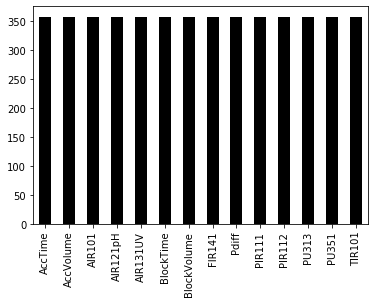

In [84]:
missing = dpc_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

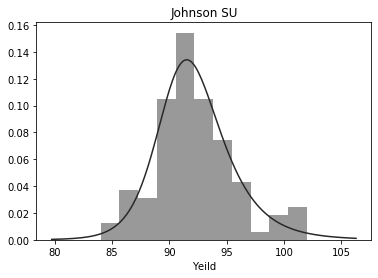

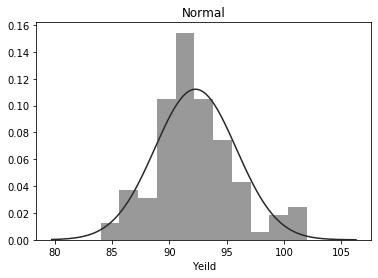

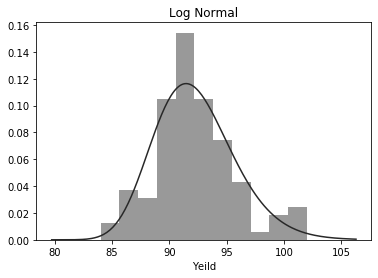

In [85]:
y = in_out_df['Yeild']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

## Figuring out NA values

In [86]:
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','AccTime','AccVolume','BlockTime','BlockVolume'])
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]
print(Xbar_S_df.shape)
Xbar_S_df.head()

(387942, 12)


,Batch,AIR101,AIR121pH,AIR131UV,CurrentBlock,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
75621,899032,20.200001,4.04,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,19.544573
75622,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.563358
75623,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.502754
75624,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.554283
75625,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.543154


In [87]:
# 18170
nan_value = float("NaN")
Xbar_S_df.replace("", nan_value, inplace=True)
Xbar_S_df.dropna(subset = ['AIR101', 'AIR121pH', 'AIR131UV', 'FIR141','Pdiff', 'PIR111', 'PIR112', 'PU351', 'TIR101','PU313'], 
                 inplace=True)
Xbar_S_df.shape #369772

(387585, 12)

In [88]:
# 900105    14350
# 902319     3453
# 935530      119
# 900605      118
# 955041      118
# 893256       12

In [89]:
missing = Xbar_S_df.isna().sum()
missing

Batch           0
AIR101          0
AIR121pH        0
AIR131UV        0
CurrentBlock    0
FIR141          0
Pdiff           0
PIR111          0
PIR112          0
PU313           0
PU351           0
TIR101          0
dtype: int64

In [90]:
# missing = Xbar_S_df.isnull().sum()
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar()
len(list(Xbar_S_df.Batch.value_counts().unique()))

95

## Central Limit Theorem:
The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed

In [91]:
Batch_CB_ls=['Batch','CurrentBlock']
CLT_ls=Xbar_S_df.columns.drop(Batch_CB_ls)
CLT_df=Xbar_S_df.copy()

In [92]:
CLT_df.head()

,Batch,AIR101,AIR121pH,AIR131UV,CurrentBlock,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
75621,899032,20.200001,4.04,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,19.544573
75622,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.563358
75623,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.502754
75624,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.554283
75625,899032,20.200001,4.04,0.0,Setup,0.0,0.0,0.0,0.0,0.0,0.0,19.543154


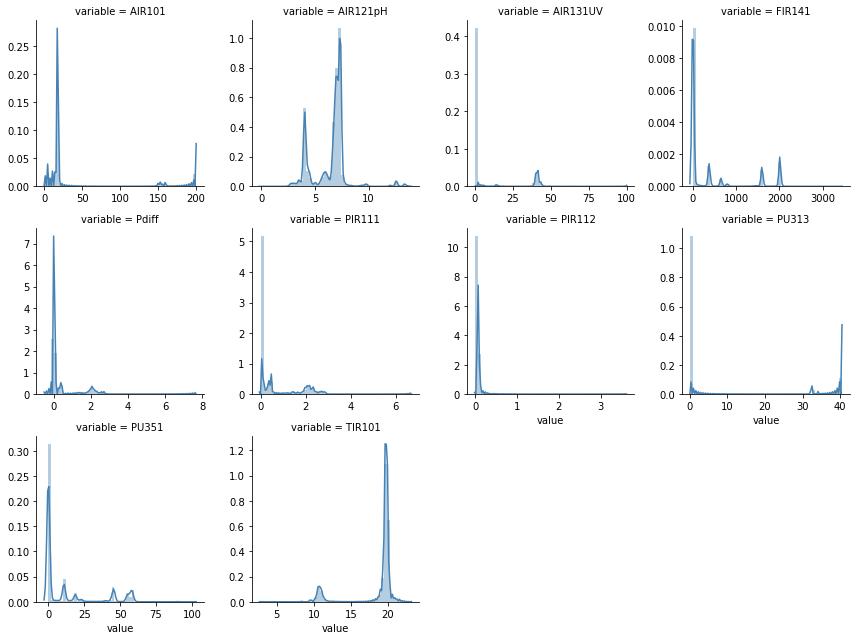

In [434]:
f = pd.melt(CLT_df[CLT_ls], value_vars=CLT_ls)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",color="steelblue")

In [94]:
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data\\PythonExcels')
os.getcwd()

'D:\\OneDrive\\OneDrive\\MSc_Project\\Data\\PythonExcels'

In [95]:
CLT_excel=CLT_df[CLT_ls].describe().round(2)
CLT_excel

,AIR101,AIR121pH,AIR131UV,FIR141,Pdiff,PIR111,PIR112,PU313,PU351,TIR101
count,387585.00,387585.00,387585.00,387585.00,387585.00,387585.00,387585.00,387585.00,387585.00,387585.00
mean,39.34,6.45,5.64,407.53,0.43,0.45,0.05,4.69,12.37,18.61
std,58.76,1.60,14.16,709.07,0.78,0.81,0.08,12.65,20.22,2.98
min,0.00,0.09,0.00,0.00,-0.46,0.00,0.00,0.00,0.00,2.76
25%,17.00,5.73,0.00,0.00,0.00,0.00,0.01,0.00,0.00,19.44
50%,17.60,6.97,0.00,0.00,0.04,0.03,0.03,0.00,0.00,19.68
75%,18.50,7.32,0.10,384.03,0.34,0.39,0.07,0.00,16.44,19.87
max,200.00,13.71,100.00,3376.91,7.60,6.63,3.61,40.50,100.00,23.08


In [96]:
writer = pd.ExcelWriter("CLT_excel.xlsx", engine='xlsxwriter')
CLT_excel.to_excel(writer, "Zero")
writer.save()

In [97]:
Zero_count_excel=(CLT_df == 0).astype(int).sum(axis=0)
Zero_count_excel

Batch                0
AIR101           15563
AIR121pH             0
AIR131UV        192766
CurrentBlock         0
FIR141          230690
Pdiff            84426
PIR111          133814
PIR112           55863
PU313           340439
PU351           240874
TIR101               0
dtype: int64

In [98]:
writer = pd.ExcelWriter("Zero_count_excel.xlsx", engine='xlsxwriter')
Zero_count_excel.to_excel(writer, "Zero")
writer.save()

## Removing Columns with Many Zero's:
['AIR131UV','FIR141','PIR111','PU351']

In [99]:
Zero_cols_ls=['AIR131UV','FIR141','PIR111','PU351','Pdiff','PU313']
Zero_cols=CLT_df.columns.drop(Zero_cols_ls)
Zero_df=CLT_df[Zero_cols]
(Zero_df == 0).astype(int).sum(axis=0)

Batch               0
AIR101          15563
AIR121pH            0
CurrentBlock        0
PIR112          55863
TIR101              0
dtype: int64

In [100]:
Zero_df.head() #(316686)

,Batch,AIR101,AIR121pH,CurrentBlock,PIR112,TIR101
75621,899032,20.200001,4.04,,0.0,19.544573
75622,899032,20.200001,4.04,Setup,0.0,19.563358
75623,899032,20.200001,4.04,Setup,0.0,19.502754
75624,899032,20.200001,4.04,Setup,0.0,19.554283
75625,899032,20.200001,4.04,Setup,0.0,19.543154


In [101]:
print(Zero_df.shape) # 387585-316686
Zero_df  = Zero_df[~(Zero_df == 0).any(axis=1)]
print(Zero_df.shape) # (316686, 4) 70899
(Zero_df == 0).astype(int).sum(axis=0)

(387585, 6)
(316686, 6)


Batch           0
AIR101          0
AIR121pH        0
CurrentBlock    0
PIR112          0
TIR101          0
dtype: int64

In [102]:
ImpCol_describe_excel=Zero_df.describe().round(2)
ImpCol_describe_excel

,Batch,AIR101,AIR121pH,PIR112,TIR101
count,316686.00,316686.00,316686.00,316686.00,316686.00
mean,925121.73,42.39,6.42,0.06,18.45
std,19241.69,61.67,1.39,0.09,3.11
min,899032.00,0.00,0.09,0.00,2.76
25%,905263.00,17.00,5.91,0.02,19.35
50%,922661.00,17.60,6.99,0.04,19.65
75%,945139.00,18.50,7.32,0.07,19.85
max,955203.00,200.00,13.71,3.61,22.50


In [103]:
Zero_df.shape

(316686, 6)

In [104]:
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data')
Zero_df.to_csv('Full_Zero_df.csv')

In [105]:
writer = pd.ExcelWriter("ImpCol_describe_excel.xlsx", engine='xlsxwriter')
ImpCol_describe_excel.to_excel(writer, "Describe")
writer.save()

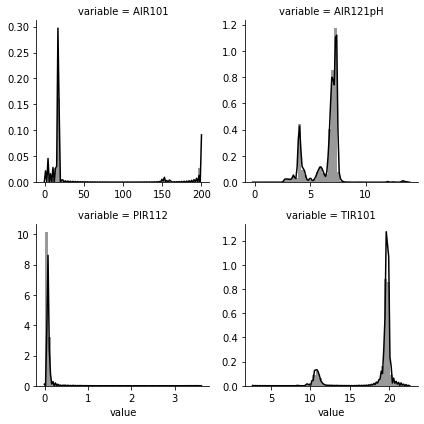

In [106]:
No_Batch_CB_cols_ls=Zero_df.columns.drop(['Batch', 'CurrentBlock'])
f = pd.melt(Zero_df, value_vars=No_Batch_CB_cols_ls)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

        Batch    AIR101  AIR121pH                 CurrentBlock    PIR112  \
75793  899032  0.020074 -1.264066        Pre_use_Rinse_Airtrap  1.818453   
75794  899032  0.190587 -1.264066         Pre_use_Rinse_Filter  1.851601   
75795  899032  0.117492 -1.264066  Pre_use_Rinse_column_tubing  1.424047   
75796  899032  0.190587 -1.264066         Pre_use_Rinse_Outlet  0.215832   
75797  899032  0.190587 -1.264066       Column_Storage_Removal -1.610032   

         TIR101  
75793 -0.340906  
75794 -0.312030  
75795 -0.184140  
75796 -0.350155  
75797 -0.608994  
Column: AIR101


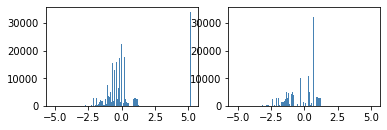

Column: AIR121pH


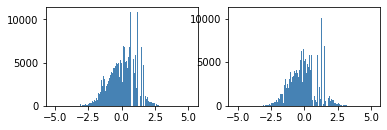

Column: PIR112


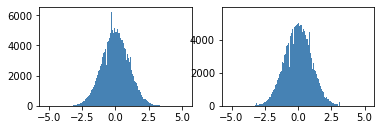

Column: TIR101


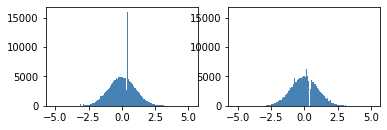

(316686, 6)


,Batch,AIR101,AIR121pH,CurrentBlock,PIR112,TIR101
75793,899032,-0.016310,-1.261282,Pre_use_Rinse_Airtrap,1.819938,-0.344343
75794,899032,0.188033,-1.261282,Pre_use_Rinse_Filter,1.849776,-0.316905
75795,899032,0.114446,-1.261282,Pre_use_Rinse_column_tubing,1.430438,-0.186794
75796,899032,0.188033,-1.261282,Pre_use_Rinse_Outlet,0.218833,-0.354165
75797,899032,0.188033,-1.261282,Column_Storage_Removal,-1.608325,-0.619136


In [435]:
# We will apply Box-Cox transformation as all the data is Exponential. So it needs log transform.
# we can use the Box-Cox to perform the log transform by setting lambda explicitly to 0.
print(Zero_df.head())
for cols in No_Batch_CB_cols_ls:
    qt = QuantileTransformer(output_distribution='normal')
    no = qt.fit_transform(Zero_df[cols].values.reshape(-1, 1))
#     data=boxcox(Zero_df[cols], 0)
    print("Column:",cols)
    plt.subplot(2, 2, 1)
    plt.hist(Zero_df[cols], bins='auto',color="steelblue")
    plt.subplot(2, 2, 2)
    plt.hist(no, bins='auto',color="steelblue")
    plt.show()
    Zero_df[cols]=no
print(Zero_df.shape)
Zero_df.head()

## Finding Highly correlated phases

In [108]:
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data')
Zero_df.to_csv('Normalized_Zero_df.csv')

In [109]:
# def spearman(frame, features):
#     spr = pd.DataFrame()
#     spr['feature'] = features
#     spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
#     spr = spr.sort_values('spearman')
#     plt.figure(figsize=(6, 0.25*len(features)))
#     sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
# features = quantitative + qual_encoded
# spearman(Zero_df, No_Batch_CB_cols_ls)

In [438]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
# correlation_dict=correlation_dict.fromkeys(list(correlation_cols))
correlation_dict = {}
# outlier_dict['Batch']=batch_id
def correlation_variable(df,currentblock):
    correlation_cols=df.columns.drop(['Yeild'])
    spr = pd.DataFrame()
    spr['feature'] = correlation_cols
    spr['spearman'] = [df[f].corr(df['Yeild'], 'pearson') for f in correlation_cols]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(correlation_cols)))
    ax=sns.barplot(data=spr, y='feature', x='spearman', orient='h',palette="vlag")
    ax.set(xlabel=currentblock, ylabel='Feature')
    plt.show()
    correlation_dict=dict(zip(spr.feature, spr.spearman))
    correlation_dict['CurrentBlock']=currentblock
#     print("Currentblock:",color.BOLD +currentblock+ color.END + "\n")
#     for data_2 in correlation_cols:
#         coef, p = spearmanr(data1['Yeild'], data1[data_2])
# #         print('Spearmans correlation coefficient: %.3f' % coef)
#         alpha = 0.05
#         if p > alpha or abs(coef) < 0.5:
#             correlation_dict[data_2]="Uncorrelated"
# #             print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
#         else:
#             print(coef)
# #             correlation_dict[data_2].append("Correlated")
#             correlation_dict[data_2]="Correlated"
    
    return correlation_dict

In [111]:
# from scipy.stats import spearmanr
# # correlation_dict=correlation_dict.fromkeys(list(correlation_cols))
# correlation_dict = {}
# # outlier_dict['Batch']=batch_id
# def correlation_variable(df,currentblock):
#     correlation_cols=df.columns.drop(['Yeild'])
#     spr = pd.DataFrame()
#     spr['feature'] = correlation_cols
#     spr['spearman'] = [df[f].corr(df['Yeild'], 'spearman') for f in correlation_cols]
#     spr = spr.sort_values('spearman')
#     plt.figure(figsize=(6, 0.25*len(correlation_cols)))
#     ax=sns.barplot(data=spr, y='feature', x='spearman', orient='h')
#     ax.set(xlabel=currentblock, ylabel='Feature')
#     plt.show()
#     correlation_dict=dict(zip(spr.feature, spr.spearman))
#     correlation_dict['CurrentBlock']=currentblock
# #     print("Currentblock:",color.BOLD +currentblock+ color.END + "\n")
# #     for data_2 in correlation_cols:
# #         coef, p = spearmanr(data1['Yeild'], data1[data_2])
# # #         print('Spearmans correlation coefficient: %.3f' % coef)
# #         alpha = 0.05
# #         if p > alpha or abs(coef) < 0.5:
# #             correlation_dict[data_2]="Uncorrelated"
# # #             print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
# #         else:
# #             print(coef)
# # #             correlation_dict[data_2].append("Correlated")
# #             correlation_dict[data_2]="Correlated"
    
#     return correlation_dict

In [112]:
# from scipy.stats import spearmanr
# # correlation_dict=correlation_dict.fromkeys(list(correlation_cols))
# correlation_dict = {}
# # outlier_dict['Batch']=batch_id
# def correlation_variable(data1,currentblock):
#     correlation_cols=data1.columns.drop(['Yeild'])
#     correlation_dict['CurrentBlock']=currentblock
# #     print("Currentblock:",color.BOLD +currentblock+ color.END + "\n")
#     for data_2 in correlation_cols:
#         coef, p = spearmanr(data1['Yeild'], data1[data_2])
# #         print('Spearmans correlation coefficient: %.3f' % coef)
#         alpha = 0.05
#         if p > alpha or abs(coef) < 0.5:
#             correlation_dict[data_2]="Uncorrelated"
# #             print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
#         else:
#             print(coef)
# #             correlation_dict[data_2].append("Correlated")
#             correlation_dict[data_2]="Correlated"
    
#     return correlation_dict

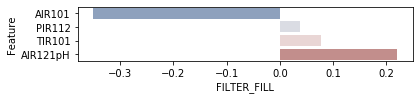

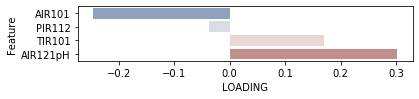

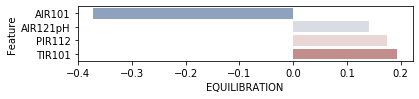

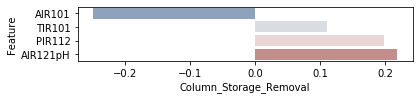

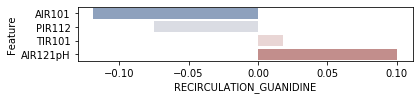

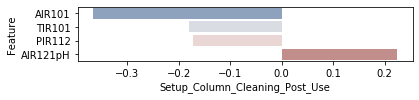

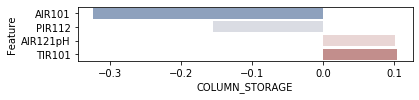

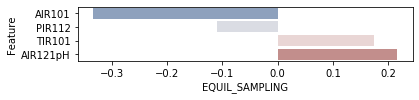

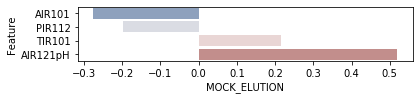

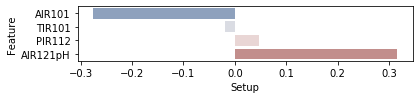

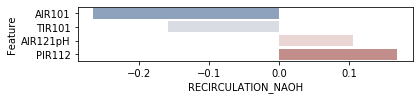

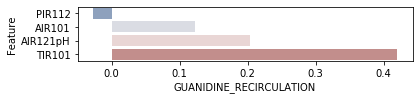

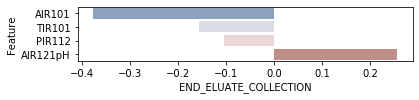

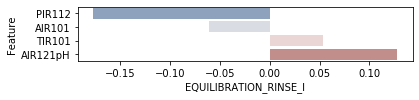

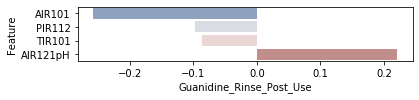

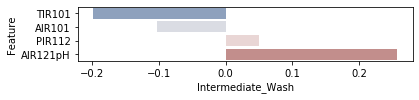

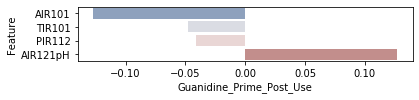

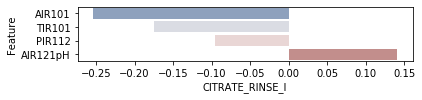

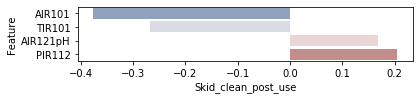

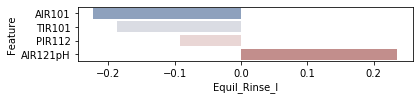

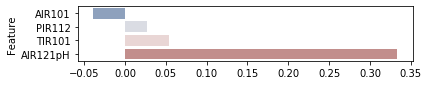

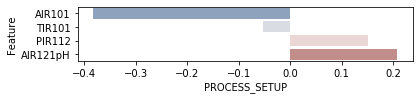

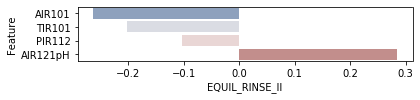

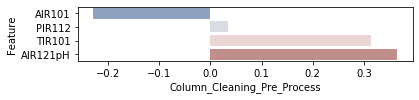

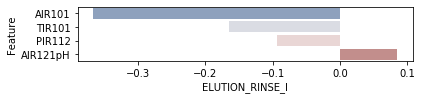

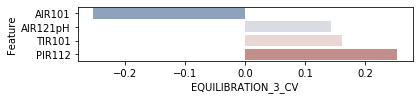

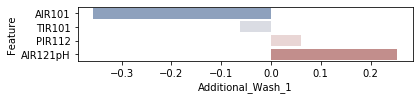

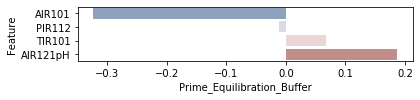

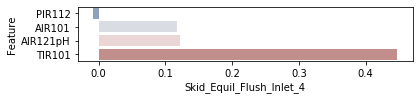

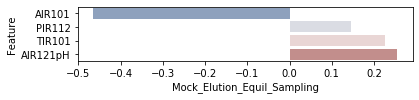

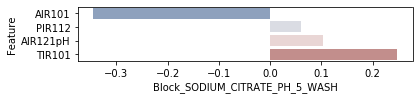

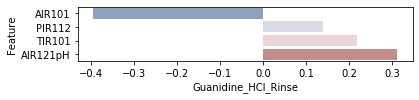

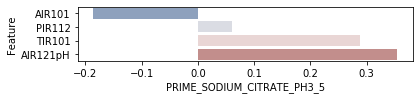

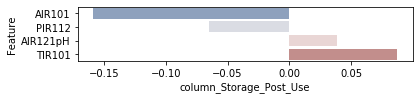

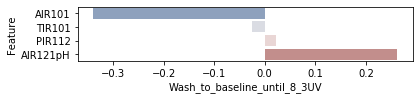

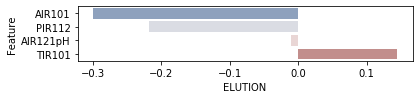

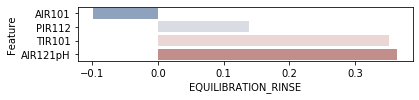

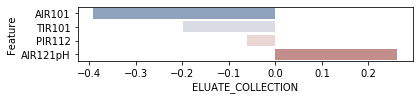

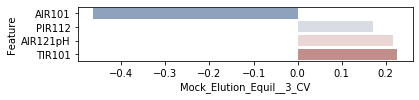

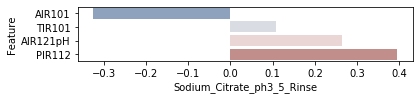

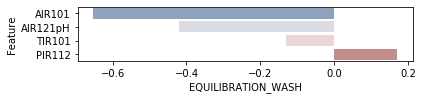

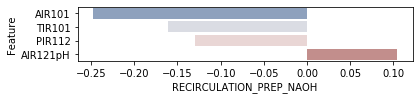

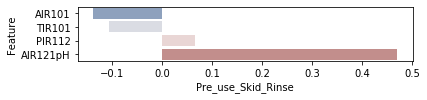

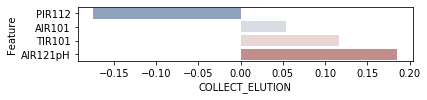

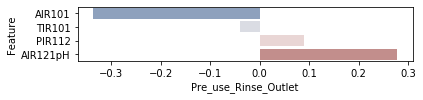

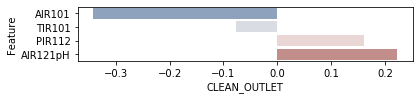

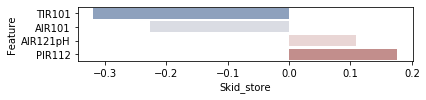

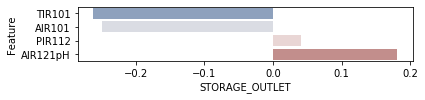

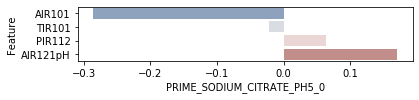

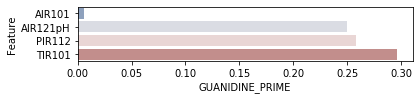

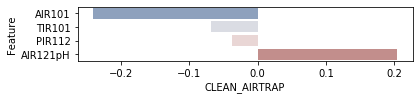

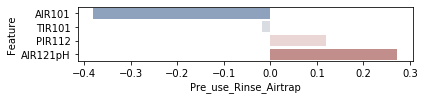

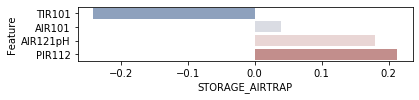

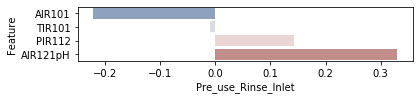

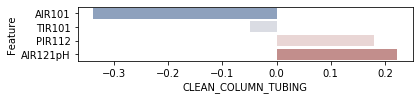

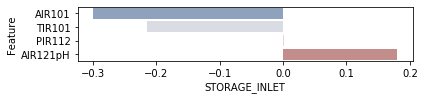

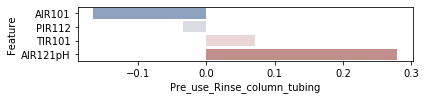

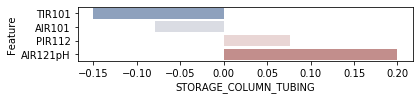

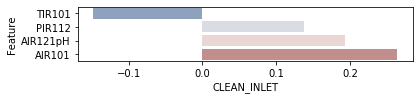

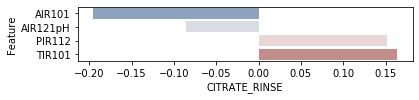

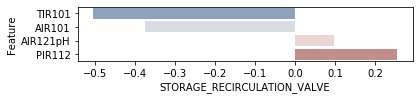

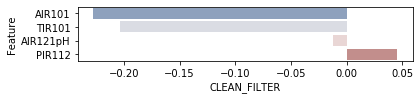

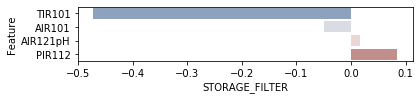

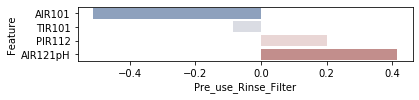

In [439]:
# Final_Correlation_df=pd.DataFrame()
CurrentBlock_ls=list(Zero_df.CurrentBlock.value_counts().index)
def Correlation_function():
    Final_Correlation_df=pd.DataFrame()
    for currenblock in CurrentBlock_ls:
        phase_corr_df=Zero_df.mask_one_equal('CurrentBlock',currenblock).groupby(['Batch']).mean().reset_index()
        correlation_df=pd.merge(phase_corr_df, in_out_df, on='Batch')
        correlation_cols=correlation_df.columns.drop(['Batch ID.1', 'difference_in',
                                                      'Batch','difference_out','Output','Input'])
        correlation_df=correlation_df[correlation_cols]
        if correlation_df.shape[0]>=10:
            correlation_dict=correlation_variable(correlation_df,currenblock)
            Final_Correlation_df=Final_Correlation_df.append(correlation_dict,ignore_index=True)
    Final_Correlation_df.set_index('CurrentBlock', inplace=True)
    return Final_Correlation_df
Final_Correlation_df=Correlation_function()

### Considering absolute mean of all the columns to form WEIGHTS

In [114]:
Final_Corr_excel=Final_Correlation_df.sort_values('AIR121pH',ascending=False).round(2)
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data\\PythonExcels')
# writer = pd.ExcelWriter("Final_Corr_excel.xlsx", engine='xlsxwriter')
# Final_Corr_excel.to_excel(writer, "Weighted")
# writer.save()
Final_Corr_excel

,AIR101,AIR121pH,PIR112,TIR101
CurrentBlock,,,,
MOCK_ELUTION,-0.29,0.52,-0.20,0.22
Pre_use_Skid_Rinse,-0.13,0.47,0.07,-0.13
Pre_use_Rinse_Filter,-0.50,0.41,0.20,-0.08
Column_Cleaning_Pre_Process,-0.26,0.36,0.03,0.31
EQUILIBRATION_RINSE,-0.10,0.36,0.14,0.36
PRIME_SODIUM_CITRATE_PH3_5,-0.19,0.35,0.06,0.29
,-0.04,0.33,0.03,0.05
Pre_use_Rinse_Inlet,-0.22,0.33,0.14,-0.01
Setup,-0.27,0.31,0.05,-0.02


In [115]:
# WeightMeans_excel=Weights_df.sort_values(ascending=False).round(2)
# os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data\\PythonExcels')
# writer = pd.ExcelWriter("WeightMeans_excel.xlsx", engine='xlsxwriter')
# WeightMeans_excel.to_excel(writer, "Weighted")
# writer.save()

NameError: name 'Weights_df' is not defined

In [ ]:
Weights_df=Final_Correlation_df.abs().mean(axis=1)
weight_batch_df=Zero_df.groupby(['Batch','CurrentBlock']).mean()
test_df=weight_batch_df.reset_index()
test_df=test_df.mask_many_equal('CurrentBlock',Weights_df.index)
Batch_un_ls=Zero_df['Batch'].unique().tolist()
Batch_dict={}

Imp_cols_ls=['AIR101','AIR121pH','PIR112','TIR101']
Final_Weighted_df=pd.DataFrame()
for batch in Batch_un_ls:
    Phase_un_ls=test_df.mask_one_equal('Batch',batch)['CurrentBlock'].unique().tolist()
    cols_dict={}
    cols_dict['Batch']=batch
    for cols in Imp_cols_ls:
        Col_phase_ls=[]
        for phase in Phase_un_ls:
            Col_phase_ls.append(float(test_df.mask_one_equal('Batch',batch).mask_one_equal('CurrentBlock',phase)[cols]*Weights_df[phase]))
        cols_dict[cols]=statistics.mean(Col_phase_ls)
    Final_Weighted_df=Final_Weighted_df.append(cols_dict,ignore_index=True)

In [ ]:
Zero_df

In [ ]:
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data')
Zero_df.to_csv('Zero_df.csv')

In [ ]:
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data')
Final_Weighted_df.to_csv('WeightedMean.csv')

In [ ]:
# for cols in Final_Weighted_df.columns.drop(['Batch']):
#     plt.hist(Final_Weighted_df[cols], bins='auto')
#     plt.show()

## Box plot construction requires a sample of at least n= 5 (preferably larger)

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
Unique_batch_ls=list(Zero_df.Batch.unique())

def boxplot_whole(batch,cols):
    time_p_df=Zero_df.mask_one_equal('Batch',batch)
    ordered_weight_ls=Weights_df.sort_values(ascending =False)
    final_weight_ls=list(ordered_weight_ls[ordered_weight_ls>0.15].index)

    chose_cb_ls=list(time_p_df.CurrentBlock.unique())
    set_difference = list(set(chose_cb_ls) - set(final_weight_ls))
    new_time_p_df=time_p_df.mask_many_equal('CurrentBlock',set_difference)

    CB_value_counts=new_time_p_df.CurrentBlock.value_counts()
    CB_moreThan5_ls=list(CB_value_counts[CB_value_counts>10].index)
    new_time_p_df=new_time_p_df.mask_many_equal('CurrentBlock',CB_moreThan5_ls)

    f = pd.melt(new_time_p_df, id_vars=[cols], value_vars='CurrentBlock')
    g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
    g = g.map(boxplot, "value", cols).set(xlabel=batch, ylabel=cols)
    return g

for batch in Unique_batch_ls:    
    for cols in ['AIR101', 'AIR121pH', 'PIR112', 'TIR101']:
        g=boxplot_whole(batch,cols)
        g
        plt.show()

## anova

In [ ]:
Anova_cols=Zero_df.columns.drop(['Batch'])
Anova_df=Zero_df[Anova_cols]

Anova_melt = pd.melt(Anova_df, id_vars=['CurrentBlock'], value_vars=['AIR101', 'AIR121pH','PIR112', 'TIR101'])
Anova_melt.columns = ['CurrentBlock', 'Features', 'value']
# sns.boxplot(x="CurrentBlock", y="value", hue="Features", data=Anova_melt, palette="Set3")

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(CurrentBlock) + C(Features) + C(CurrentBlock):C(Features)', data=Anova_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Interpretation: The P-value obtained from ANOVA analysis for CurrentBlock, Features (AIR101 etc), and interaction are statistically significant (P<0.05). We conclude that type of CurrentBlock significantly affects the yield outcome, Features significantly affects the yield outcome, and interaction of both CurrentBlock and Features (years) significantly affects the yield outcome.

### ANOVA between different phases of column AIR101. Whether there is any variation between different phases of the same column

Hypothesis:  
H0: Means are similar between different groups  
Ha: Means are not similar between different groups

In [440]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(Zero_df['AIR101'],
                            Zero_df['CurrentBlock'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
                                            Additional_Wash_1  -0.4508  0.001 -0.5363 -0.3653   True
                               Block_SODIUM_CITRATE_PH_5_WASH  -1.4737  0.001 -1.5706 -1.3768   True
                                                CITRATE_RINSE  -2.6691  0.001  -3.008 -2.3302   True
                                              CITRATE_RINSE_I  -1.3072  0.001   -1.38 -1.2345   True
                                                CLEAN_AIRTRAP    0.339  0.001  0.1379  0.5401   True
                                          CLEAN_COLUMN_TUBING   0.3983  0.001  0.1041  0.6926   True
                                                 CLEAN_FILTER   0.4036 0.0647 -0.0067  0.81

In [ ]:
# tukey_multicomp=MultiComp.tukeyhsd().summary()
# type(tukey_multicomp)
# tukey_df = (tukey_multicomp.tables[1])
# type(tukey_df)
# fmt_dict=dict()
# type(tukey_multicomp)
# tukey_multicomp.as_csv(**fmt_dict)
results_as_html = tukey_multicomp.as_html()
tukey_df=pd.read_html(results_as_html, header=0, index_col=0)[0]
tukey_df.head()
# results_as_html = tukey_multicomp.tables[1].as_html()
# pd.read_html(results_as_html, header=0, index_col=0)[0]

In [ ]:
writer = pd.ExcelWriter("tukey_df.xlsx", engine='xlsxwriter')
tukey_df.to_excel(writer, "Describe")
writer.save()

### Cummulative ANOVA analysis between different phases of one column

In [ ]:
def anova(frame):
#     anova_cols=['AIR101', 'AIR121pH','PIR112', 'TIR101']
    anv = pd.DataFrame()
    pvals = []
    features=[]
    CB=['CurrentBlock']
    samples = []
    for cls in frame['CurrentBlock'].unique():
        s = list(frame[frame['CurrentBlock'] == cls]['AIR101'].values)
        if len(s)>20:
            samples.append(s)
            pval = stats.f_oneway(*samples)[1]
            pvals.append(pval)
            features.append(cls)
    anv['pval'] = pvals
    anv['CurrentBlock'] = features
    return anv.sort_values('pval')

a = anova(Zero_df)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(16, 6))
sns.barplot(data=a, x='CurrentBlock', y='')
x=plt.xticks(rotation=90)

### Between columns each phase, whether different columns with same phase any similarity or not using ANOVA
As can be seen most of the values are zero. This is because there p-values are zero. which means that there is not much similarity between same phases of different columns.

In [ ]:
def anova(frame):
    anova_cols=['AIR101', 'AIR121pH','PIR112', 'TIR101']
    anv = pd.DataFrame()
    pvals = []
    features=[]
    CB=['CurrentBlock']
    samples = []
    for cls in frame['CurrentBlock'].unique():
        for cols in anova_cols:    
            s = list(frame[frame['CurrentBlock'] == cls][cols].values)
            if len(s)>20:
                samples.append(s)
        if samples:        
            pval = stats.f_oneway(*samples)[1]
            pvals.append(pval)
            features.append(cls)
    anv['pval'] = pvals
    anv['CurrentBlock'] = features
    return anv.sort_values('pval')

a = anova(Zero_df)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(16, 6))
sns.barplot(data=a, x='CurrentBlock', y='disparity')
x=plt.xticks(rotation=90)

In [ ]:
Weights=Weights_df.sort_values(ascending=False).round(2)
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data\\PythonExcels')
writer = pd.ExcelWriter("Weights.xlsx", engine='xlsxwriter')
Weights.to_excel(writer, "Weighted")
writer.save()

In [ ]:
# from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
#                                          MultiComparison)

# # Set up the data for comparison (creates a specialised object)
# Tukey_cols=['AIR101', 'AIR121pH','PIR112', 'TIR101']
# MultiComp = MultiComparison(Zero_df[Tukey_cols],
#                             Zero_df['CurrentBlock'])

# # Show all pair-wise comparisons:

# # Print the comparisons

# print(MultiComp.tukeyhsd().summary())

In [ ]:
Zero_df.columns

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
Unique_batch_ls=list(Zero_df.Batch.unique())

def boxplot_whole():
#     time_p_df=Zero_df.mask_one_equal('Batch',batch)
    time_p_df=Zero_df.copy()
#     ordered_weight_ls=Weights_df.sort_values(ascending =False)
#     final_weight_ls=list(ordered_weight_ls[ordered_weight_ls>0.15].index)

    chose_cb_ls=list(time_p_df.CurrentBlock.unique())
#     set_difference = list(set(chose_cb_ls) - set(final_weight_ls))
    new_time_p_df=time_p_df.mask_many_equal('CurrentBlock',chose_cb_ls)

    CB_value_counts=new_time_p_df.CurrentBlock.value_counts()
    CB_moreThan5_ls=list(CB_value_counts[CB_value_counts>20].index)
    new_time_p_df=new_time_p_df.mask_many_equal('CurrentBlock',CB_moreThan5_ls)
    f = pd.melt(new_time_p_df, id_vars=['AIR101', 'AIR121pH','PIR112', 'TIR101'], value_vars='CurrentBlock')
    unique_phase_ls=list(f.value.unique())
    
    for cols in ['AIR101', 'AIR121pH','PIR112', 'TIR101']:
        
        for only_4_phase in range(0,len(unique_phase_ls),4):
            print("---------------------------------------------------------------------------\n\t\t\t\t",cols)
            print("---------------------------------------------------------------------------")
            phases=unique_phase_ls[only_4_phase:only_4_phase+4]
            f1=f.mask_many_equal('value',phases)
            g = sns.FacetGrid(f1, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
            g.map(boxplot, "value", cols).set(xlabel='Phases', ylabel=cols)
            plt.show()
        

boxplot_whole()
# for batch in Unique_batch_ls:    
#     for cols in ['AIR101', 'AIR121pH', 'PIR112', 'TIR101']:
#         g=boxplot_whole(batch,cols)
#         g
#         plt.show()

In [ ]:
Weights_df_excel=Weights_df.sort_values(ascending=False)
writer = pd.ExcelWriter("Weights_df_excel.xlsx", engine='xlsxwriter')
Weights_df_excel.to_excel(writer, "Weighted")
writer.save()
Weights_df_excel

In [ ]:
Weights_df.sort_values(ascending=False)

### Final Batch Wise analysis:

In [ ]:
exclude_batchid=[893635, 891813, 893063, 893256, 893737, 923465, 894377, 892524, 955308, 893457, 
                 892914, 893971, 892374, 892151, 894649, 892762]
Xbar_S_cols = dpc_df.columns.drop(['Date','UnitID','BatchID_Calc','CurrentBlock','AccTime',
                                   'AccVolume','BlockTime','BlockVolume'])
Xbar_S_df=dpc_df[~dpc_df['Batch'].isin(exclude_batchid)][Xbar_S_cols]

Except_Batch_cols = Xbar_S_df.columns.drop(['Batch'])

Xbar_S_Batch_ls=Xbar_S_df['Batch'].unique().tolist()
Xbar_S_new_df=Xbar_S_df.groupby(['Batch'])[Except_Batch_cols].mean()

x=Xbar_S_new_df.values
        
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
A2=0.308
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
D4=1.777
D3=0.223
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r) or group < D3*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

In [ ]:
nobatch=Final_Weighted_df.columns.drop(['Batch'])
# a = spc(Final_Weighted_df[nobatch]) + mewma() + rules()
# print(a)
a = spc(Final_Weighted_df[nobatch]) + ewma() + rules()
print(a)
a = spc(Final_Weighted_df[nobatch]) + cusum() + rules()
print(a)
a = spc(Final_Weighted_df[nobatch]) + mewma() + rules()
print(a)
# a = spc(Final_Weighted_df[nobatch]) + hotelling() + rules()
# print(a)